# **Welcome to Hotel Cancellation Analysis**
###### Project by Louisa Veronica

## **Business Understanding**
Hotel merupakan bisnis yang menjual "perishable inventory", dimana kamar yang tidak terjual di hari sebelumnya tidak dapat dijual kembali di hari yang akan datang. Dengan demikian, hotel perlu untuk memanage inventory (kamar) sedemikian rupa, sehingga hotel dapat memperoleh profit semaksimal mungkin. Hotel dapat memaksimalkan profit dengan 3 cara, yaitu:
1. Keep existing customer

   Cara yang dapat digunakan untuk retain customer adalah dengan memastikan customer satisfaction. Guest yang puas tentunya akan kembali lagi untuk stay di hotel dan akan mempromosikan hotel kepada customer lain, sehingga dapat membantu untuk menambah new customer ("word of mouth marketing") dan memastikan bertambahnya profit
2. Add  new customer
   
   Hotel tidak dapat hanya mengandalkan existing customer, melainkan juga harus dapat menambah customer baru. Dengan mengetahui siapa saja guest yang stay di hotel, hotel dapat dengan tepat melakukan marketing untuk menarik new guest untuk stay di hotel dan menambah profit
3. Maximize efficiency
   
   Hotel memiliki fixed cost yang besar untuk dapat beroperasi. Oleh karena itu, hotel perlu untuk memastikan inventory yang dimiliki terjual semaksimal mungkin. Dengan demikian, sangat perlu bagi hotel untuk dapat mendeteksi siapa saja guest yang akan cancel, sehingga dapat mereplace bookingan tersebut dengan new booking dan dapat memprediksi budget untuk variable cost (jumlah staff yang bekerja, kebutuhan bahan makanan, amenity, etc)


### **Preliminary**
*   Objective Statement:
    *   Mendapatkan business insight untuk mengetahui siapa saja guest yang stay di hotel dan bagaimana detail dari bookingan yang diterima oleh hotel
    *   Mendapatkan business insight dengan menjawab pertanyaan pada deep dive question section
    *   Mengklasifikasikan bookingan apakah akan cancel atau tidak

*   Business Benefit:
    *   Memaksimalkan profit yang diperoleh oleh hotel:
        1. Hotel dapat menargetkan marketing dengan tepat dan menjual kepada customer yang tepat
        2. Hotel dapat meningkatkan efisiensi dengan memprediksi bookingan yang cancel dan mereplace bookingan tersebut

*   Challenges:
    *   Jumlah data yang besar
    *   Adanya missing value, duplikat, kolom yang tidak relevan dan redudancy
   
*   Methodology/Analytic Technique:
    *   Exploratory Data Analysis
    *   Deep-Dive Exploration
    *   Classification


## **Data Understanding**
*   Sumber data: Hotel Booking Demand yang berasal dari Kaggle, yang dapat diakses melalui link sebagai berikut:
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

    Selain itu, tertulis di Kaggle bahwa original artikel berasal dari jurnal sebagai berikut:
https://www.sciencedirect.com/science/article/pii/S2352340918315191#s0010 

*   Data merupakan real booking atas city hotel di Lisbon dan resort hotel di Algarve, dimana keduanya terpisahkan sejauh 280 km dengan mobil dan terletak di Portugal, Eropa Selatan, dengan waktu check-in antara 1 July 2015 - 31 August 2017

*   Data detail:
    *   hotel: tipe hotel, yaitu resort hotel atau city hotel
    *   is_canceled: apakah bookingan tersebut dicancel atau tidak
    *   lead_time: rentang waktu antara tanggal booking dan tanggal kedatangan (check-in)
    *   arrival_date_year: tahun kedatangan (check-in) 
    *   arrival_date_month: bulan kedatangan (check-in)
    *   arrival_date_week_number: minggu kedatangan (check-in)
    *   arrival_date_day_of_month: tanggal kedatangan (check-in)
    *   stays_in_weekend_nights: jumlah malam hari malam minggu (hari Sabtu atau Minggu) dimana guest stay
    *   stay_in_week_nights: jumlah malam hari biasa (hari Senin - Jumat) dimana guest stay
    *   adults: jumlah dewasa yang stay di hotel
    *   children: jumlah anak yang stay di hotel
    *   babies: jumlah bayi yang stay di hotel
    *   meal: tipe makanan yang termasuk dalam bookingan, terdiri atas undefined/SC (tidak include meal package), BB (hanya include breakfast), HB (include breakfast dan 1 lagi additional meal (biasanya dinner), FB (include breakfast, lunch, dinner)
    *   country: negara asal guest yang stay
    *   market_segment: segmen pasar dari bookingan tersebut, terdiri atas TA (travel agent) dan TO (tour operator)
    *   distribution_channel: jalur distribusi bookingan berasal, terdiri atas TA (travel agent) dan TO (tour operator)
    *   is_repeated_guest: apakah bookingan berasal dari tamu yang sudah pernah stay sebelumnya (diasumsikan bahwa tanggal pembuatan customer profile lebih dulu daripada tanggal pembuatan bookingan ini)
    *   previous_cancellations: jumlah bookingan yang pernah dicancel customer sebelum membuat bookingan ini (diasumsikan bahwa jika customer bukan repeater guest (customer baru), maka = 0)
    *   previous_bookings_not_canceled: jumlah bookingan yang tidak dicancel customer sebelum membuat bookingan ini (diasumsikan bahwa jika customer bukan repeater guest (customer baru), maka = 0)
    *   reserved room type: tipe kamar yang dibooking
    *   assigned_room_type: tipe kamar stay actual
    *   booking_changes: jumlah perubahan/amendemen yang dilakukan sebelum akhirnya guest check-in atau mengcancel bookingan (bisa berupa perubahan nama, tanggal stay, jumlah tamu, etc)
    *   deposit_type: tipe deposit yang dibayarkan, terdiri atas no deposit (tidak ada deposit yang dibayarkan), non refund (deposit dibayarkan sejumlah total biaya stay), refundable (deposit dibayarkan di bawah total biaya stay)
    *   agent: ID agent yang membuat bookingan
    *   company: ID company yang membuat bookingan atau melakukan pembayaran atas bookingan ini
    *   days_in_waiting_list: jumlah hari bookingan berada di waiting list sampai akhirnya diconfirm ke customer (rentang waktu antara tanggal booking diinput ke sistem dan tanggal booking diconfirm ke guest)
    *   customer_type: tipe booking, terdiri atas contract (ketika bookingan memiliki allotment ataupun contract lainnya), group (ketika bookingan berasal dari group), transient (ketika bookingan bukan berasal dari contract atau group dan tidak berhubungan dengan bookingan lainnya), transient party (ketika bookingan berasal dari contract atau group dan tidak berhubungan dengan bookingan lainnya)
    *   adr: average daily rate (penjumlahan atas revenue yang berasal dari guest yang stay dibagi dengan jumlah room night)
    *   required_car_parking_spaces: jumlah tempat parkir mobil yang dibutuhkan
    *   total_of_special_requests: jumlah special request yang disampaikan (seperti kamar di lantai tinggi, kasur twin, kamar tidak merokok, etc)
    *   reservation_status: status terakhir atas bookingan, terdiri atas canceled (bookingan dicancel oleh guest), check out (guest sudah selesai stay), no show (guest tidak check-in dan tidak menginformasikan pada hotel)
    *   reservation_status_date: tanggal terakhir perubahan reservation_status dibuat

## **Import Library**

In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#Install Package
!pip install squarify
#!pip install category_encoders
!pip install dalex
!pip install scikit-plot
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import Warning
import warnings
warnings.filterwarnings('ignore')

#Import Package
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib.lines import Line2D
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import squarify as sq
import missingno

from imblearn import under_sampling, over_sampling
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.metrics import plot_roc_curve
from sklearn import metrics

import dalex as dx
import scikitplot as skplt 
import shap

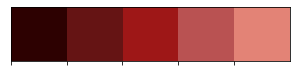

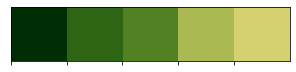

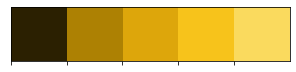

In [ ]:
#Menentukan Color Palette
colors_red = ["#2d0101","#651414", "#9E1717", "#b95252","#e38376"]
colors_green = ["#012d04","#2d6514","#528124","#aab952","#d5d170"]
colors_yellow = ["#2b2001","#ad8103","#dda60b","#f7c31b","#fada5e"]

sns.palplot(colors_red)
sns.palplot(colors_green)
sns.palplot(colors_yellow)

## **Load dataset**

In [ ]:
#Upload Data
df = pd.read_csv("hotel_bookings.csv")
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015


## **Data Preprocessing**

In [ ]:
#Mengecek Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Observation:
1. Data memiliki 32 kolom dengan 119390 baris
2. Terdapat 12 kolom yang bertipe data Categorical dan 20 kolom yang bertipe data Numerical
3. Data terlihat memiliki tipe data yang sesuai dengan kolomnya, kecuali untuk beberapa kolom yang seharusnya adalah categorical, tetapi ditulis dalam angka, seperti: is_canceled dan is_repeated_guest ataupun agent dan company yang tertulis dalam angka untuk menutupi data aslinya. Untuk memudahkan EDA, beberapa kolom akan diubah tipe datanya
4. Terdapat kolom date yang harus ditreatment agar dapat dianalisa lebih lanjut
5. Terdapat kolom yang tidak diperlukan dalam analisa, tetapi perlu dianalisa lebih lanjut sebelum ditreatment
6. Harus dilakukan pengecekan untuk memastikan bahwa total room nights (stays_in_weekend_nights + stays_in_week_nights) dan total person (adults + children + babies) tidak = 0 karena tidak make sense apabila tidak ada jumlah malam menginap ataupun tidak ada jumlah orang dalam 1 bookingan. Secara best practice, minimum harus berjumlah 1
7. Terdapat indikasi adanya missing value karena beberapa kolom memiliki jumlah data yang berbeda dengan jumlah total baris

In [ ]:
#Mengubah Tipe Data arrival_date_month
df["arrival_date_month"] = pd.to_datetime(df["arrival_date_month"], format='%B').dt.month.astype("int64")

In [ ]:
#Mengubah Tipe Data reservation_status_date
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"],dayfirst=True)

In [ ]:
#Mengecek Jumlah Total Room Nights = 0
filterRN = (df["stays_in_weekend_nights"] == 0) & (df["stays_in_week_nights"] == 0)

#Membuang Row dengan Jumlah Total Room Nights = 0
df = df[~filterRN]
df.shape

(118675, 32)

In [ ]:
#Mengecek Jumlah Total Person = 0
filterPerson = (df["adults"] == 0) & (df["children"] == 0)  & (df["babies"] == 0)

#Membuang Row dengan Jumlah Total Person = 0
df = df[~filterPerson]
df.shape

(118565, 32)

Observation:
1. Jumlah baris berkurang dari 119390 menjadi 118565

## **Data Cleaning**

####Missing Value

In [ ]:
#Mengecek Adanya Missing Value
missing = pd.DataFrame({"Missing Value" : df.isnull().sum(), "% Missing Value" : df.isnull().sum()/len(df)*100})
missing[missing["Missing Value"]>0]

,Missing Value,% Missing Value
children,4,0.003374
country,473,0.398937
agent,16079,13.561338
company,111870,94.353308


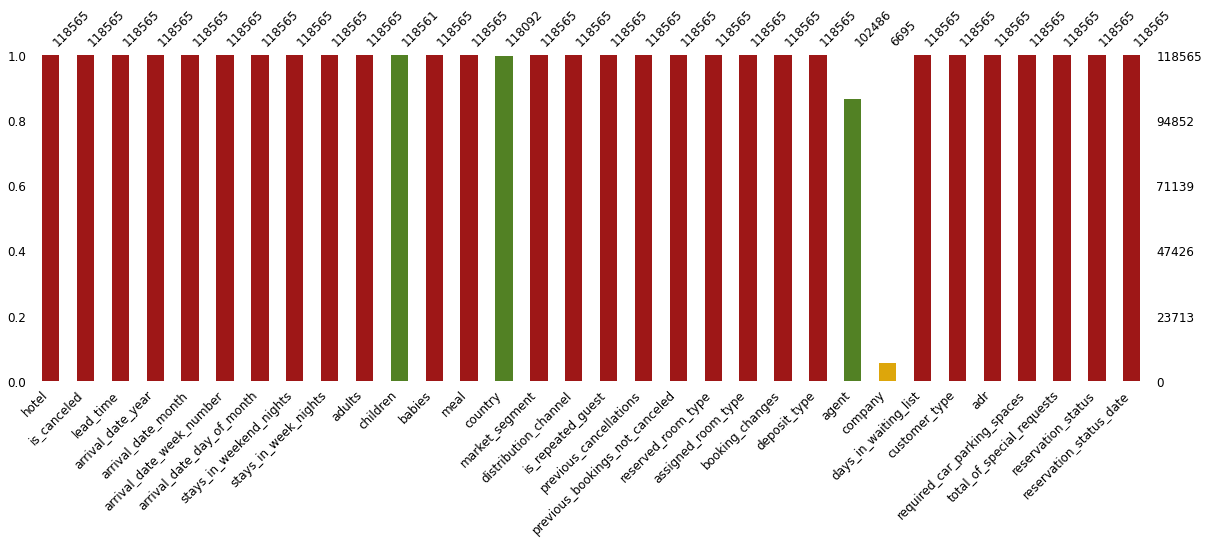

In [ ]:
#Memvisualisasikan Missing Value
color = [colors_red[2],colors_red[2],colors_red[2],colors_red[2],colors_red[2],colors_red[2],colors_red[2],colors_red[2],colors_red[2],colors_red[2],
         colors_green[2],colors_red[2],colors_red[2],colors_green[2],colors_red[2],colors_red[2],colors_red[2],colors_red[2],colors_red[2],colors_red[2],
         colors_red[2],colors_red[2],colors_red[2],colors_green[2],colors_yellow[2],colors_red[2],colors_red[2],colors_red[2],colors_red[2],colors_red[2],
         colors_red[2],colors_red[2]]
missingno.bar(df,fontsize =12, color=color, figsize = (20,6))
plt.show()

In [ ]:
#Mengecek Modus dari country
df["country"].mode()

0    PRT
dtype: object

Observation:
1. Terdapat 4 kolom yang memiliki missing value yang harus dihandle dengan cara sebagai berikut:

      *  Kolom children : diisi dengan 0 karena diasumsikan tidak ada children yang stay pada bookingan tersebut 

      *  Kolom country : diisi dengan Portugal karena merupakan modus dari country. Selain itu, secara best practice, kolom country seringkali kosong apabila negara asal guest adalah negara dimana hotel berada
      
      *  Kolom agent : diisi dengan 0 karena tidak semua bookingan berasal dari agent (bisa saja berasal dari group, direct, etc), sehingga kolom agent menjadi kosong

      * Kolom company : drop column karena lebih dari 90% kolom company kosong

In [ ]:
#Mereplace Blank pada Kolom children
df["children"]=df["children"].fillna(0)

#Mereplace Blank pada Kolom country
df["country"]=df["country"].fillna(df["country"].mode()[0])

#Mereplace Blank pada Kolom agent
df["agent"]=df["agent"].fillna(0)

#Mendrop Kolom company
df=df.drop(columns=["company"])

In [ ]:
#Mengecek Ulang Missing Value
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
#Mengecek Ulang Dimensi Data Setelah Mentreatment Missing Value
df.shape

(118565, 31)

Observation:
1. Missing Value telah berhasil ditangani
2. Jumlah kolom berkurang dari 32 menjadi 31


####Duplicate

In [ ]:
#Mengecek Adanya Duplikat
df.duplicated().sum()

31952

Observation:
1. Terdapat 31952 baris yang terduplicate yang harus diremove

In [ ]:
#Meremove Duplikat
df=df.drop_duplicates()

In [ ]:
#Mengecek Ulang Duplikat
df.duplicated().sum()

0

In [ ]:
#Mengecek Ulang Dimensi Data Setelah Mentreatment Duplikat
df.shape

(86613, 31)

Observation:
1. Duplikat telah berhasil ditangani
2. Jumlah baris berkurang dari 118565 menjadi 86613

## **Exploratory Data Analysis**

In [ ]:
#Mengubah is_repeated_guest Menjadi Yes No untuk Mempermudah Visualisasi
df["is_repeated_guest"] = df["is_repeated_guest"].replace({1:"Yes", 0:"No"})

#Mengubah agent Menjadi String untuk Mempermudah Visualisasi
df["agent"] = df["agent"].astype(str)

In [ ]:
#Mengelompokkan Kolom
NumericalMetric = ["stays_in_weekend_nights","stays_in_week_nights","lead_time","adr",
                   "previous_cancellations","previous_bookings_not_canceled","booking_changes","days_in_waiting_list"]
BookingDetails = ["hotel","deposit_type","reservation_status","reserved_room_type","assigned_room_type","meal"]
BookingSource = ["is_repeated_guest","customer_type","market_segment","distribution_channel","agent","country"]
BookingAttribute = ["adults","children","babies","required_car_parking_spaces","total_of_special_requests"]
BookingDate = ["arrival_date_year","arrival_date_month","arrival_date_week_number","arrival_date_day_of_month","reservation_status_date"]

Bedasarkan kolom yang tersedia, akan lebih mudah untuk dianalisa apabila kolom tersebut dikategorikan menjadi sebagai berikut:
1. Numericalmetric berisikan kolom hotel metric yang bertipe data numeric
2. BookingDetails berisikan kolom mengenai booking hotel yang tidak termasuk dalam source ataupun attribute dan bertipe data categorical
3. BookingSource berisikan kolom mengenai asal bookingan yang bertipe data categorical, kecuali untuk is_repeat_guest dan agent yang seharusnya categorical, tetapi berisi angka untuk menutupi data asli
4. BookingAttribute berisikan kolom mengenai attribute dari bookingan dan bertipe data numeric
5. BookingDate berisikan kolom yang bertipe data date

Selain itu, terdapat kolom is_canceled yang merupakan target variable

####Statistical Summary

######Categorical Data

In [ ]:
#Statistical Summary untuk BookingDetails
df[BookingDetails].describe()

,hotel,deposit_type,reservation_status,reserved_room_type,assigned_room_type,meal
count,86613,86613,86613,86613,86613,86613
unique,2,3,3,9,11,5
top,City Hotel,No Deposit,Check-Out,A,A,BB
freq,53041,85468,62628,55988,46077,67396


In [ ]:
#Statistical Summary untuk BookingSource
df[BookingSource].describe()

,is_repeated_guest,customer_type,market_segment,distribution_channel,agent,country
count,86613,86613,86613,86613,86613,86613
unique,2,4,8,5,334,177
top,No,Transient,Online TA,TA/TO,9.0,PRT
freq,83468,71348,51280,68643,28652,27283


Observation:
1. Masing-masing kolom memiliki jumlah unqiue yang berbeda-beda dari 2 hingga maksimum 11, kecuali untuk agent dan country yang tentunya terdapat beragam agent dan country yang booking hotel
2. Terlihat value dengan frekuensi terbanyak untuk masing - masing kolom

######Date Data

In [ ]:
#Statistical Summary untuk BookingDate
df[BookingDate].describe(include="all")

,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reservation_status_date
count,86613.000000,86613.000000,86613.000000,86613.000000,86613
unique,NaN,NaN,NaN,NaN,926
top,NaN,NaN,NaN,NaN,2016-02-14 00:00:00
freq,NaN,NaN,NaN,NaN,210
first,NaN,NaN,NaN,NaN,2014-10-17 00:00:00
last,NaN,NaN,NaN,NaN,2017-09-14 00:00:00
mean,2016.212231,6.472423,26.823433,15.817499,NaN
std,0.685996,3.092128,13.651026,8.835567,NaN
min,2015.000000,1.000000,1.000000,1.000000,NaN
25%,2016.000000,4.000000,16.000000,8.000000,NaN


Observation:
1. Dataset terdiri atas arrival date 2015 - 2017 dan rata-rata arrival date pada bulan Juni, minggu ke-26, tahun 2016
2. Reservation status date menunjukkan tanggal perubahan status terakhir, rata-rata, yaitu pada tanggal 14 February 2016, yang bisa saja merupakan tanggal check out, tanggal cancel, ataupun tanggal no show

######Numeric Data

In [ ]:
#Statistical Summary untuk Numerical Metric
df[NumericalMetric].describe()

,stays_in_weekend_nights,stays_in_week_nights,lead_time,adr,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list
count,86613.00000,86613.000000,86613.000000,86613.000000,86613.000000,86613.000000,86613.000000,86613.000000
mean,1.01165,2.642236,80.313706,107.254680,0.030573,0.184464,0.268239,0.750476
std,1.02759,2.035293,86.077778,54.355864,0.370590,1.737408,0.710015,10.030920
min,0.00000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,12.000000,72.900000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,2.000000,50.000000,99.000000,0.000000,0.000000,0.000000,0.000000
75%,2.00000,4.000000,126.000000,134.450000,0.000000,0.000000,0.000000,0.000000
max,19.00000,50.000000,709.000000,5400.000000,26.000000,72.000000,18.000000,391.000000


In [ ]:
#Statistical Summary untuk BookingAttribute
df[BookingAttribute].describe()

,adults,children,babies,required_car_parking_spaces,total_of_special_requests
count,86613.000000,86613.000000,86613.000000,86613.000000,86613.000000
mean,1.880665,0.139344,0.010864,0.084722,0.700253
std,0.622239,0.456955,0.113856,0.282298,0.832659
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,1.000000
max,55.000000,10.000000,10.000000,8.000000,5.000000


Observation:
1. Mean > 50% (Median) mengindikasikan bahwa kolom tersebut memiliki positive skewed distribution
2. Mean < 50% (Median) mengindikasikan bahwa kolom tersebut memiliki negative skewed distribution
3. Mean = 50% (Median) mengindikasikan bahwa kolom tersebut memiliki normal distribution
4. Akan tetapi, apabila selisih antara mean dan 50% (Median) tidak besar, maka cukup dilakukan standardisasi saja. Jika tidak, perlu dilakukan log transformation / sqrt untuk menormalkan data
5. Jika melihat pada nilai min dan max pada adr, angka terlihat tidak make sense karena adr tidak seharusnya bernilai negatif. Selain itu, adr rata-rata adalah 107, sehingga perlu dicek adanya outlier karena nilai max terlalu tinggi dibandingkan dengan nilai rata-rata ataupun 75% data
6. Jika melihat pada nilai max saja pada adults, children, babies, dan required_parking_spaces, harus dilakukan pengecekan lebih lanjut darimana bookingan tersebut berasal. Apabila berasal dari group, maka make sense, tetapi jika berasal dari non-group, maka tidak make sense

####Univariate Analysis

######Plot untuk Mengetahui Distribusi dari Target Variable

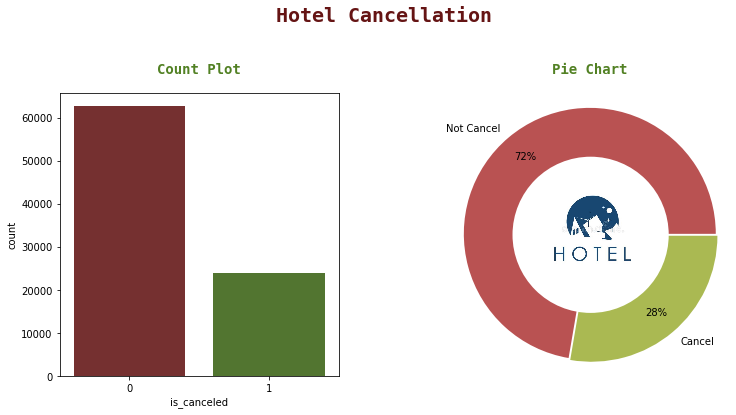

In [ ]:
#Memvisualisasikan Target Variable
#Membuat Subplot untuk Target Variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Hotel Cancellation", size = 20, fontname="monospace", color = colors_red[1], weight="bold")
axs = [ax1, ax2]

#Membuat Countplot untuk Target Variable
sns.countplot(df["is_canceled"], ax=ax1, palette=["#812424","#528124"])
ax1.set_title("Count Plot", size = 14, fontname="monospace", color = colors_green[2], weight="bold", pad=20)

#Menentukan Attribute Pie Chart
label = ["Not Cancel", "Cancel"]
value = df["is_canceled"].value_counts()
colors = [colors_red[3],colors_green[3]]
explode = (0.01, 0.01)

#Membuat Pie Chart
ax2.pie(x=value, labels=label, colors=colors,autopct='%1.0f%%', pctdistance=0.8,explode=explode)
ax2.set_title("Pie Chart", size = 14, fontname="monospace", color = colors_green[2], weight="bold", pad=20)

#Menjadikan Bagian Tengah Pie Chart Berwarna Putih
inner_circle = plt.Circle((0,0),0.62,fc="white")
ax2.add_artist(inner_circle)
ax2.axis("equal")

#Mengatur Gambar
path = mpimg.imread('/content/hotel logo.jpg')
imagebox = OffsetImage(path, zoom=0.2)
xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy, frameon=False, pad=1, xybox=(0.02, 0.05))
ax2.add_artist(ab)

#Mengadjust Subplot
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.78, wspace=0.4, hspace=None);

Observation:
1. Terdapat 72% customer yang tidak cancel dan 28% customer yang cancel. Meskipun jumlah booking yang cancel tidak sebanyak jumlah booking yang tidak cancel, namun, penting untuk mengetahui hal tersebut. Hal ini dikarenakan hotel menjual perishable inventory, yang berarti kamar hotel yang tersedia hari ini tidak dapat dijual lagi di kemudian hari. Dengan mengetahui jumlah cancellation, maka hotel dapat mengatur strategi penjualan untuk mereplace booking yang cancel. Selain itu, hotel dapat menentukan variable cost (jumlah staff yang bekerja, bahan makanan, amenity yang harus dibeli, etc) dengan lebih efisien. Dengan demikian, baik dari segi revenue maupun cost dapat lebih maksimal dan profit yang diperoleh pun menjadi semaksimal mungkin
2. Terihat bahwa terdapat ketidakseimbangan jumlah target variable yang harus ditreatment nantinya

######Plot untuk Mengetahui Distribusi dari Categorical Data

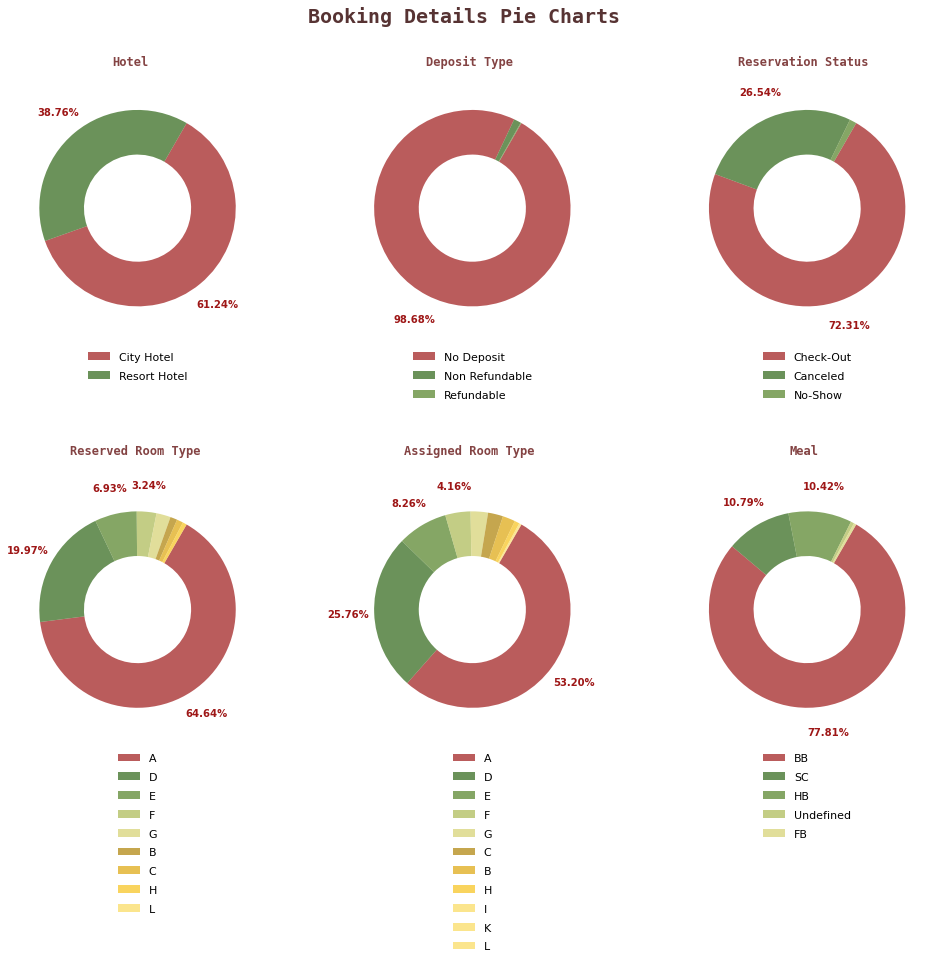

In [ ]:
#Membuat Fungsi untuk Tidak Menampilkan Label Percentage yang Terlalu Kecil
def autopct_generator(limit):
    def inner_autopct(pct):
        return ("%.2f%%" % pct) if pct > limit else ""
    return inner_autopct

#Memvisualisasikan Booking Details
#Menentukan Warna Pie Chart
c = [colors_red[2],colors_green[1],colors_green[2],colors_green[3],colors_green[4],colors_yellow[1],
     colors_yellow[2],colors_yellow[3],colors_yellow[4],colors_yellow[4],colors_yellow[4]]

#Menentukan Label
lab = [["City Hotel","Resort Hotel"],
       ["No Deposit","Non Refundable","Refundable"],
       ["Check-Out","Canceled","No-Show"],
       ["A","D","E","F","G","B","C","H","L"],
       ["A","D","E","F","G","C","B","H","I","K","L"],
       ["BB","SC","HB","Undefined","FB"]]

#Membuat Subplot
fig,ax = plt.subplots(2,3,figsize=(16,12))

#Menampilkan Judul Pie Chart
fig.text(s="Booking Details Pie Charts",size=20,fontweight="bold",
            fontname="monospace",color=colors_red[0],y=0.95,x=0.37,alpha=0.8)

for i in range(0,6):
        #Membuat Pie Chart
        ax[i//3,i%3].pie(df[BookingDetails[i]].value_counts(),autopct=autopct_generator(3),counterclock=False,
          colors=c,wedgeprops={"width":0.5,"alpha":0.7},pctdistance=1.27,startangle=60,radius=1.1,
                         textprops={"fontsize": 10,"color": colors_red[2],"fontweight": "bold"})
        #Menampilkan Legend
        ax[i//3,i%3].legend(lab[i],loc="upper center",bbox_to_anchor=(0.5,-0.1),frameon=False,
                            labelspacing=0.8,fontsize=11)

#Menampilkan Label        
fig.text(s="Hotel",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.90,x=0.2,alpha=0.8)          
fig.text(s="Deposit Type",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.90,x=0.51,alpha=0.8,ha="center")
fig.text(s="Reservation Status",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.90,x=0.8,alpha=0.8,ha="center")
fig.text(s="Reserved Room Type",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.45,x=0.22,alpha=0.8,ha="center")
fig.text(s="Assigned Room Type",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.45,x=0.51,alpha=0.8,ha="center")
fig.text(s="Meal",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.45,x=0.8,alpha=0.8,ha="center")

#Mengadjust Space Subplot
fig.subplots_adjust(wspace=0.5,hspace=0.6)

Observation:
1. Sebanyak 61.24% booking berasal dari city hotel dan sisanya berasal dari resort hotel
2. Hampir seluruh kamar yang dibooking tidak perlu membayar deposit. Hal ini cukup merugikan hotel karena tidak memiliki assurance bahwa guest akan stay, tanpa deposit tentunya guest akan lebih mudah untuk mengcancel bookingan sewaktu-waktu
3. Untuk kolom reservation status, perlu dianalisa lebih lanjut dengan membandingkan dengan kolom is_canceled karena bisa saja ini merupakah duplikat kolom dimana check-out = 0 dan canceled ataupun no show = 1
4. Terdapat 2 tipe kamar yang tidak dijual oleh hotel, yaitu I dan K karena tidak ada guest yang membooking kamar tersebut (reserved_room_type), tetapi ada guest yang stay di kamar tersebut (assigned_room_type). Selain itu, A merupakan tipe kamar dengan jumlah terbanyak dan kemungkinan tipe kamar ini adalah lowest room type category karena kebanyakan orang cenderung untuk stay di kamar dengan harga paling murah, sedangkan D kemungkinan room type category termurah kedua. Hotel sendiri banyak melakukan overbooking pada tipe kamar A dan upgrade ke tipe kamar D. Hal ini terlihat dari jumlah reserved_room_type pada tipe kamar A lebih banyak dari jumlah assigned_room_type tipe kamar A, dan sebaliknya, jumlah reserved_room_type tipe kamar D lebih sedikit dari jumlah assigned_room_type tipe kamar D
5. Lebih dari 75% guest membooking kamar include breakfast, sedangkan jumlah guest yang membooking kamar include half board dan room only hampir sama. Dengan mengetahui hal ini, hotel dapat memprediksi bahan makanan yang dibutuhkan

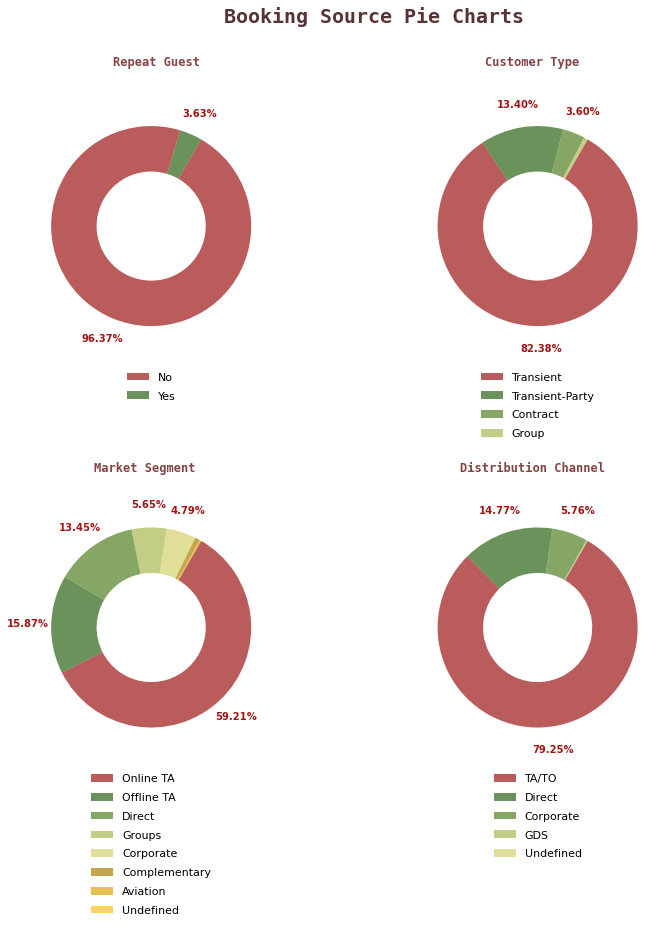

In [ ]:
#Memvisualisasikan Booking Source
#Menentukan Warna Pie Chart
c = [colors_red[2],colors_green[1],colors_green[2],colors_green[3],colors_green[4],colors_yellow[1],
     colors_yellow[2],colors_yellow[3],colors_yellow[4],colors_yellow[4]]

#Menentukan Label
lab = [['No','Yes'],
       ['Transient','Transient-Party','Contract','Group'],
       ['Online TA','Offline TA','Direct','Groups','Corporate','Complementary','Aviation','Undefined'],
       ['TA/TO','Direct','Corporate','GDS','Undefined']]

#Membuat Subplot
fig,ax = plt.subplots(2,2,figsize=(11,12))

#Menampilkan Judul Pie Chart
fig.text(s="Booking Source Pie Charts",size=20,fontweight="bold",
             fontname="monospace",color=colors_red[0],y=0.97,x=0.36,alpha=0.8)

for i in range(0,4):
        #Membuat Pie Chart
        ax[i//2,i%2].pie(df[BookingSource[i]].value_counts(),autopct=autopct_generator(3),counterclock=False,
          colors=c,wedgeprops={"width":0.5,"alpha":0.7},pctdistance=1.23,startangle=60,radius=1.1,
                         textprops={"fontsize": 10,"color": colors_red[2],"fontweight": "bold"})
        #Menampilkan Legend
        ax[i//2,i%2].legend(lab[i],loc="upper center",bbox_to_anchor=(0.5,-0.1),frameon=False,
                            labelspacing=0.8,fontsize=11)

#Menampilkan Label        
fig.text(s="Repeat Guest",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.22,alpha=0.8)          
fig.text(s="Customer Type",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.75,alpha=0.8,ha="center")
fig.text(s="Market Segment",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.45,x=0.26,alpha=0.8,ha="center")
fig.text(s="Distribution Channel",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.45,x=0.75,alpha=0.8,ha="center")

#Mengadjust Space Subplot
fig.subplots_adjust(wspace=0.7,hspace=0.6)

Observation:
1. Sebanyak 3.63% guest yang merupakan repeater guest dan sisanya adalah new guest. Dengan demikian, hotel perlu menganalisa lebih lanjut karena jumlah repeater guest sangatlah sedikit, sedangkan repeater guest dapat membantu marketing hotel secara gratis karena repeater guest cenderung puas dengan hotel dan guest yang puas tentu akan membantu mempromosikan pada orang lain
2. Hampir 60% booking berasal dari online travel agent, sedangkan offline travel agent dan direct booking memiliki proporsi yang hampir sama, yaitu kurang lebih 15%, dan sisanya berasal dari group dan corporate.Complimentary booking memiliki proporsi yang sangat kecil, yang berarti hampir semua bookingan adalah bookingan berbayar
3. Distribution channel dan market segment memiliki value yang hampir sama
4. Sejalan dengan point no. 1 dan 2, transient booking memiliki proporsi booking terbanyak, yaitu lebih dari 80%. Secara best practice, bookingan dari online travel agent dapat dikategorikan ke dalam transient, apabila bookingan tersebut tidak related dengan bookingan yang lain

Text(0.38, 0.92, 'Booking Source Wordcloud')

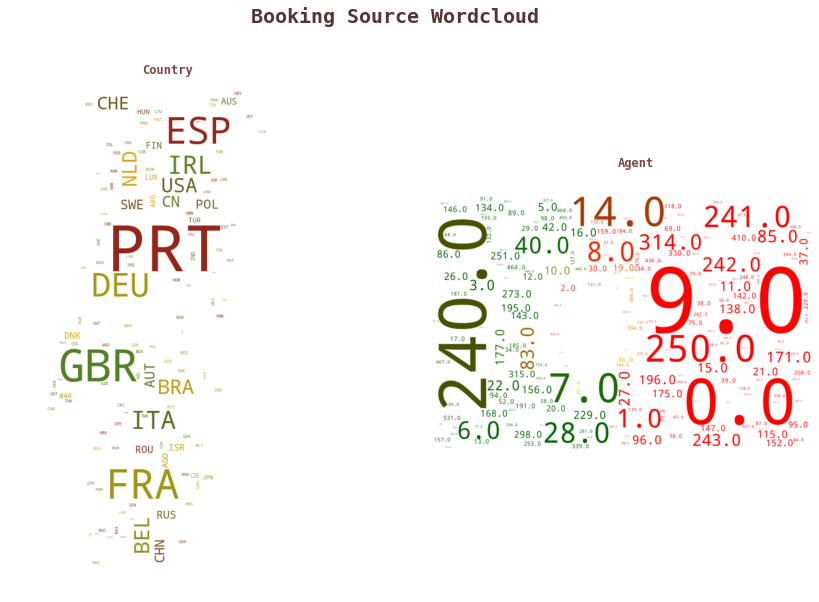

In [ ]:
#Memvisualisasikan Country
#Menginput Gambar
mask1 = np.array(Image.open("portugal map.jpg"))

#Menentukan Warna
color1 = matplotlib.colors.LinearSegmentedColormap.from_list("", [colors_red[2],colors_green[2],colors_yellow[2]])

#Membuat Wordcloud
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
wordcloud = WordCloud(mask=mask1,
                      collocations=False,
                      max_words=200,
                      colormap = color1,
                      background_color="White",
                      width=1200,
                      height=1000).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis("off")
fig.text(s="Country",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.85,x=0.28,alpha=0.8)  

#Memvisualisasikan Agent
#Menginput Gambar
mask2 = np.array(Image.open("portugal flag.png"))

#Menambahkan Subplot
ax = fig.add_subplot(1,2,2)

#Membuat Data Agent untuk Wordcloud
counts = df['agent'].value_counts()
counts.index = counts.index.map(str)

#Membuat Wordcloud
wordcloud = WordCloud(mask=mask2,
                      collocations=False,
                      max_words=200,
                      background_color="White",
                      width=1200,
                      height=1000).generate_from_frequencies(counts)

#Menentukan Warna
image_colors = ImageColorGenerator(mask2)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
fig.text(s="Agent",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.72,x=0.72,alpha=0.8)

#Menampilkan Judul Wordcloud
fig.text(s="Booking Source Wordcloud",size=20,fontweight="bold",
             fontname="monospace",color=colors_red[0],y=0.92,x=0.38,alpha=0.8)

Observation:
1. Sekitar 30% guest yang stay di hotel berasal dari Portugal sendiri, sedangkan lainnya kebanyakan adalah guest yang berasal dari European country, seperti Great Britain, France, Spanyol, Germany. Selain negara yang berasal dari Eropa sendiri, terlihat pula negara USA, yang berarti terdapat guest yang berasal dari America Serikat yang stay, dan bahkan terlihat negara CHN, yaitu China yang stay di hotel tersebut
2. Top 3 agent adalah agent dengan ID 9.0 (30% booking) disusul dengan agent dengan ID 240.0 yang memiliki booking sekitar 15%, sedangkan sisanya adalah agent yang memiliki booking di bawah 5%. Agent dengan ID 0.0 merupakah hasil imputation dari missing value yang diduga bookingan tersebut bukan berasal dari agent, sehingga tidak ada ID agentnya. Selain itu, kemungkinan agent dengan frekuensi booking terbanyak adalah agent bertipe online travel agent karena sesuai dengan market segment sebelumnya, dimana terbanyak adalah berasal dari online TA

######Bar Plot untuk Mengetahui Distribusi dari Date Data

Text(0.42, 1.01, 'Booking Date Line Plot')

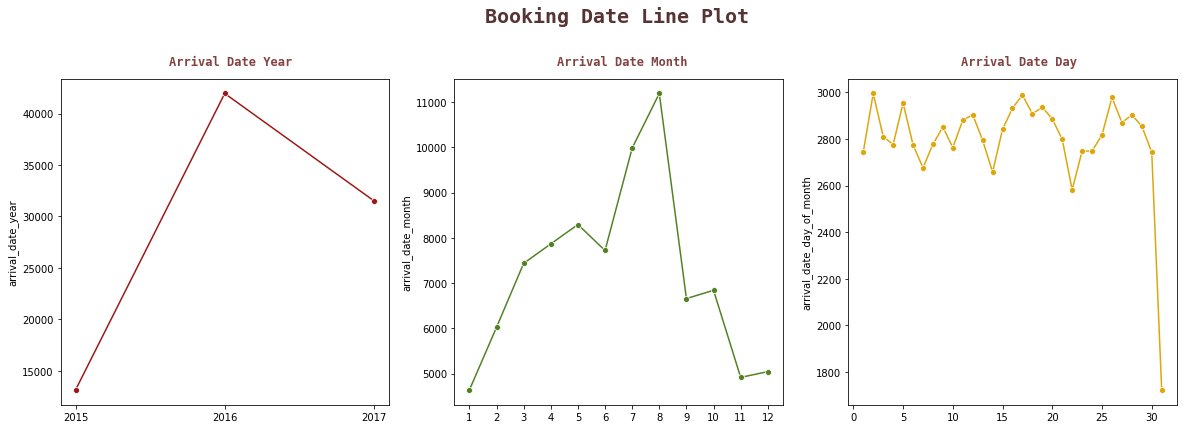

In [ ]:
#Membuat Subplot
fig, ax = plt.subplots(1,3,figsize=(20,6))

#Membuat Data untuk Visualisasi
arrival_year = df["arrival_date_year"].value_counts()
arrival_month = df["arrival_date_month"].value_counts()
arrival_day = df["arrival_date_day_of_month"].value_counts()

#Memvisualisasikan Arrival Date Year
ax1 = sns.lineplot(arrival_year.index, arrival_year,color=colors_red[2], ax=ax[0], markersize=6, marker = "o")
ax1.set_xticks([2015,2016,2017])
fig.text(s="Arrival Date Year",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.91,x=0.2,alpha=0.8)

#Memvisualisasikan Arrival Date Month
ax2 = sns.lineplot(arrival_month.index, arrival_month,color=colors_green[2], ax=ax[1], markersize=6, marker = "o")
ax2.set_xticks(range(1,13))
fig.text(s="Arrival Date Month",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.91,x=0.47,alpha=0.8)

#Memvisualisasikan Arrival Date Day
ax3 = sns.lineplot(arrival_day.index, arrival_day,color=colors_yellow[2],ax=ax[2], markersize=6, marker = "o")
fig.text(s="Arrival Date Day",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.91,x=0.75,alpha=0.8)

#Menampilkan Judul Lineplot
fig.text(s="Booking Date Line Plot",size=20,fontweight="bold",
             fontname="monospace",color=colors_red[0],y=1.01,x=0.42,alpha=0.8)

Observation:
1. Booking yang terdapat pada data adalah bookingan yang check in pada tahun 2015, 2016, dan 2017, dimana 50% data adalah untuk tahun 2016. Perlu dilihat lebih lanjut apakah data tahun 2015 dan 2017 merupakan data full year atau half year karena jumlahnya yang selisih jauh dengan tahun 2016
2. Kebanyakan guest stay pada bulan Agustus dan Juli, dimana period ini merupakan summer holiday. Sebaliknya, paling sedikit guest stay pada bulan November - February, dimana bulan tersebut adalah winter season. Dengan demikian, lebih banyak guest yang travelling pada summer daripada winter, mengingat salah satu hotel terletak di Algarve yang terkenal akan beach holiday
3. Untuk tanggal sendiri sangat bervariatif setiap bulannya yang mana hampir merata. Namun, mengingat tidak semua bulan memiliki tanggal 31, maka data langsung drop di tanggal tersebut

In [ ]:
#Mengkategorikan dan Memfilter arrival_date_week_number
weeknum_df = df[["arrival_date_week_number","is_canceled"]]
weeknum_grp = (weeknum_df
                .groupby(["arrival_date_week_number"])
                .agg(weeknum_count=("arrival_date_week_number","count"))
                .reset_index()
                .sort_values(["weeknum_count"],ascending=False))

#Mengkategorikan dan Memfilter reservation_status_date
resvstat_df = df[["reservation_status_date","is_canceled"]]
resvstat_df["reservation_status_date"] = pd.to_datetime(resvstat_df["reservation_status_date"],dayfirst=True).dt.date
resvstat_grp = (resvstat_df
                .groupby(["reservation_status_date"])
                .agg(resvstat_count=("reservation_status_date","count"))
                .reset_index()
                .sort_values(["resvstat_count"],ascending=False)
                .head(20))

Text(0.43, 1.01, 'Booking Date Treemap')

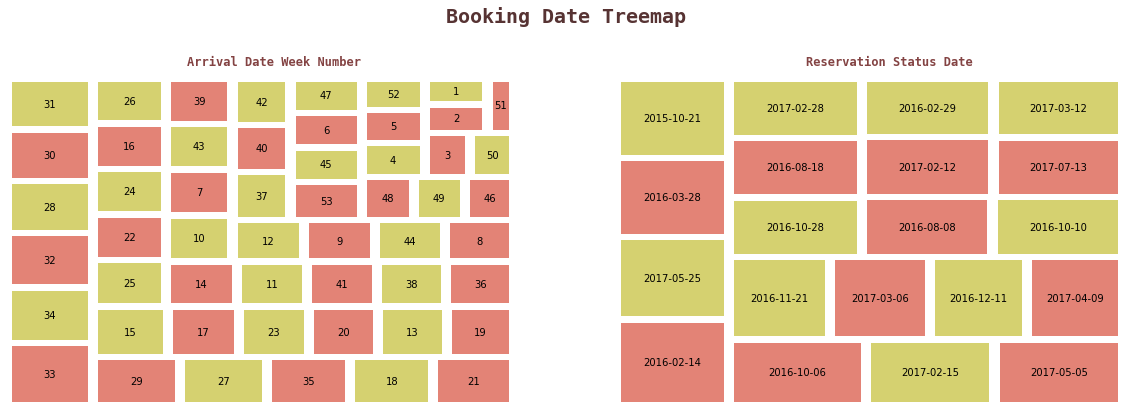

In [ ]:
#Menentukan Warna dan Label
color =  [colors_red[4],colors_green[4]]
labelweeknum = weeknum_grp.arrival_date_week_number
labelresvstat = resvstat_grp.reservation_status_date

#Membuat Subplot
fig, ax = plt.subplots(1,2,figsize=(20,6))

#Memvisualisasikan Arrival Date Week Number
sq.plot(weeknum_grp.weeknum_count, color = color, label = labelweeknum, pad = True, ax=ax[0])
ax[0].axis("off")
fig.text(s="Arrival Date Week Number",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.91,x=0.25,alpha=0.8)   

#Memvisualisasikan Reservation Status Date
sq.plot(resvstat_grp.resvstat_count, color = color, label = labelresvstat, pad = True, ax=ax[1])
ax[1].axis("off")
fig.text(s="Reservation Status Date",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.91,x=0.68,alpha=0.8)  

#Menampilkan Judul Treemap
fig.text(s="Booking Date Treemap",size=20,fontweight="bold",
             fontname="monospace",color=colors_red[0],y=1.01,x=0.43,alpha=0.8)

Observation:
1. Sesuai dengan yang telah disebutkan di atas bahwa bulan tersibuk adalah bulan Agustus dan Juli, terlihat pula bahwa minggu tersibuk adalah pada minggu - minggu di bulan tersebut, terutama pada minggu ke 33, 30, 34 dan 32. Untuk minggu ke 18, perlu dilihat lebih jauh karena kemungkinan terdapat public holiday di Portugal pada minggu tersebut
2. Perubahan reservation status date terbanyak adalah pada tanggal 14 February 2016, yang dapat merupakan tanggal check out, no show, ataupun cancel. Terlihat bahwa persentase untuk masing - masing tanggal sangatlah kecil, yang berarti tanggal tersebut menyebar selama 3 tahun


######Plot untuk Mengetahui Distribusi dari Numerical Data

In [ ]:
#Membuat Fungsi untuk Memvisualisasikan Numerical Data
def Numerical(df,feature):
    plt.figure(figsize=(14,4))

    plt.subplot(1,2,1)
    ax = sns.distplot(df[feature],color = colors_red[3])

    plt.subplot(1,2,2)
    ax = sns.boxplot(df[feature],color = colors_green[3])

    plt.show

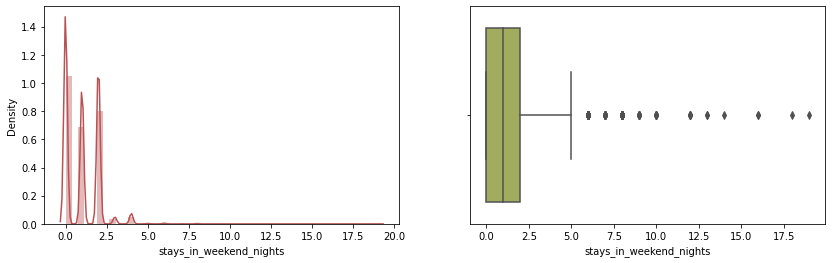

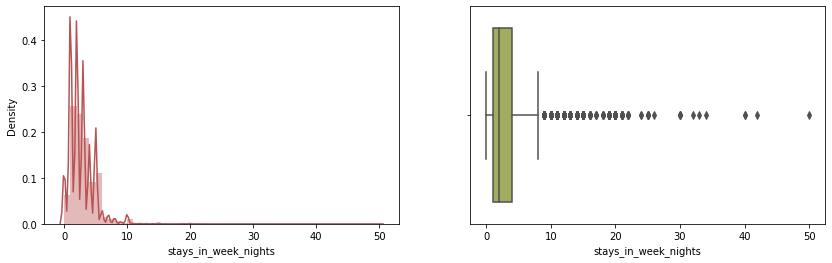

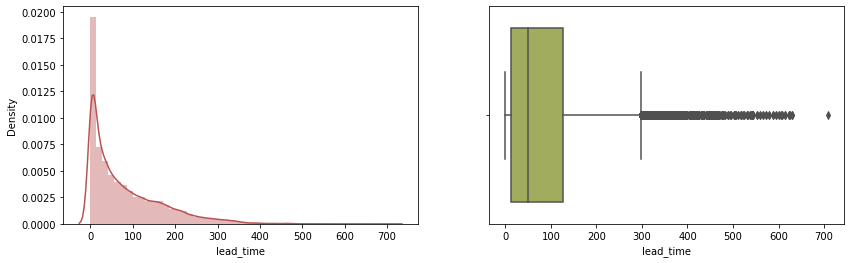

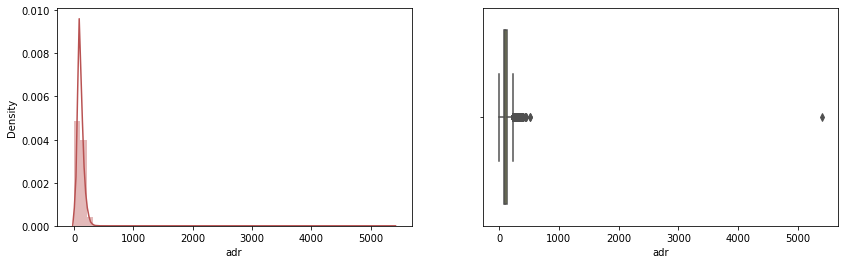

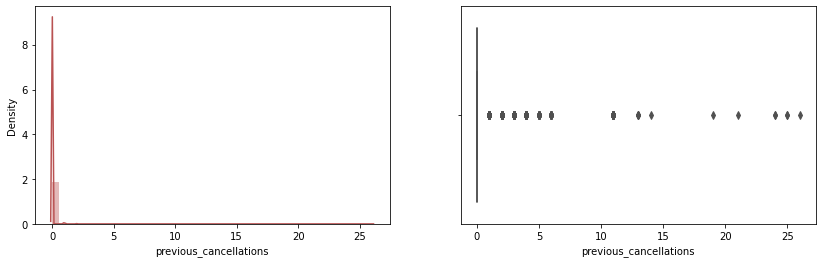

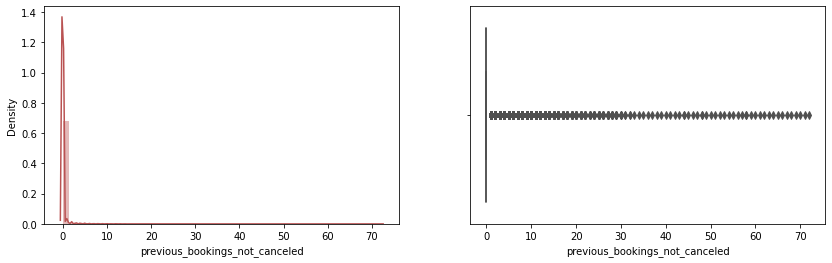

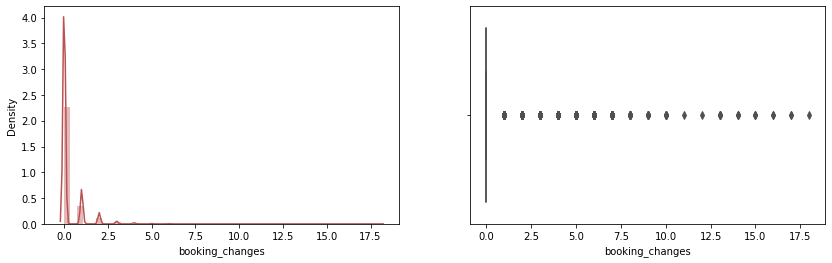

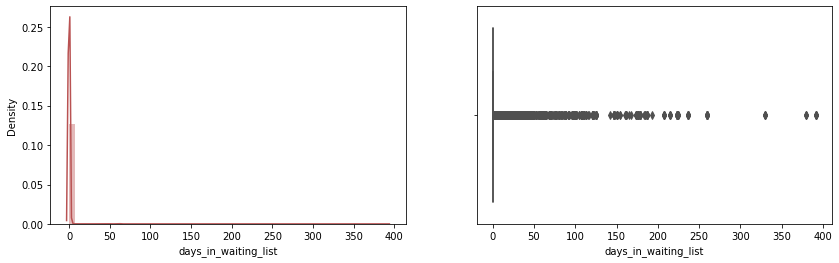

In [ ]:
#Memvisualisasikan Numerical Metric
for col in NumericalMetric:
    Numerical(df, col)

Observation:
1. Jika melihat pada stays_in_weekend_nights dan stays_in_week_nights, sebagian besar guest hanya menginap selama 1 - 3 malam, sangat jarang terdapat tamu yang stay selama lebih dari 1 minggu secara total
2. Booking  lead time rata-rata adalah 80 hari, artinya, guest membuat bookingan selama kurang lebih 2 - 3 bulan sebelum kedatangan, tetapi ada pula guest yang membooking hingga 1 tahun sebelumnya, dan sebaliknya, sangat banyak guest yang walk-in atau tidak membuat bookingan in advance. Hotel tentunya harus mengantisipasi hal tersebut setiap harinya dengan melebihkan jumlah bahan makanan, amenity, etc dan selalu menyiapkan kamar yang ready-to-stay (in case, occupancy tidak 100%)
3. adr terlihat berdistribusi cukup normal, dengan rata - rata di kisaran 100. Artinya, revenue yang diterima oleh hotel per kamar per malam dari guest adalah sebesar 100 tersebut. Namun, terlihat dari range kurang dari 0 hingga 5000, maka terindikasi adanya outlier
4. Jika melihat pada previous_cancellations dan previous_booking_not_canceled, sebagian besar guest adalah guest yang baru pertama kali menginap di hotel karena previous numbernya = 0, meskipun ada pula guest yang telah stay sebanyak lebih dari 50 kali
5. Booking yang dibuat kebanyakan adalah final booking karena terlihat dari booking_changes yang kebanyakan 0, artinya, guest sangat jarang melakukan perubahan bookingan, baik dari segi nama guest, tanggal stay, perubahan room category, etc. Hal ini kemungkinan related dari banyaknya guest yang tidak memesan lebih dulu sebelumnya dan langsung datang di hari-H, sehingga bookingan adalah final
6. Kebanyakan guest langsung mendapatkan kamar tanpa harus menunggu lama, meskipun ada pula yang harus menunggu sebelum hotel dapat mengconfirm bookingan. Namun, perlu diketahui bahwa secara best practice, hotel tidak memotong inventory kamar untuk waiting list
7. Sesuai yang telah diperkirakan sebelumnya, data memiliki banyak outlier dan tidak berdistribusi normal

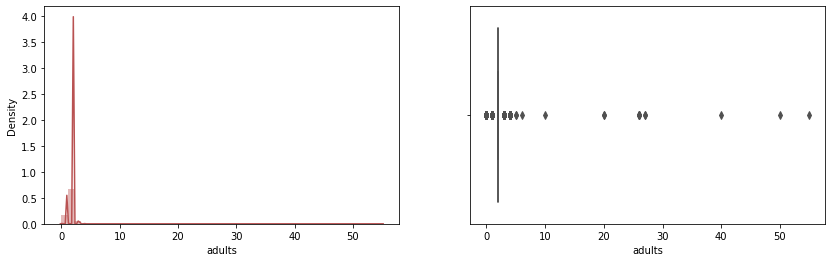

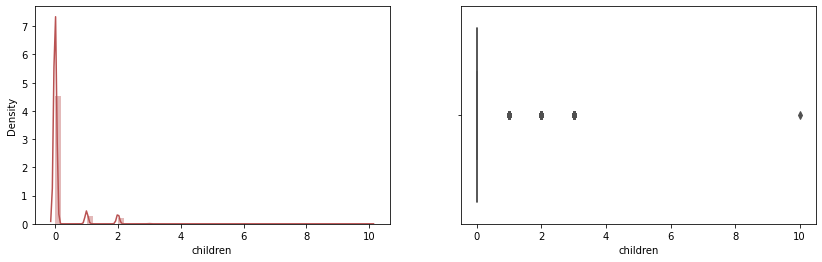

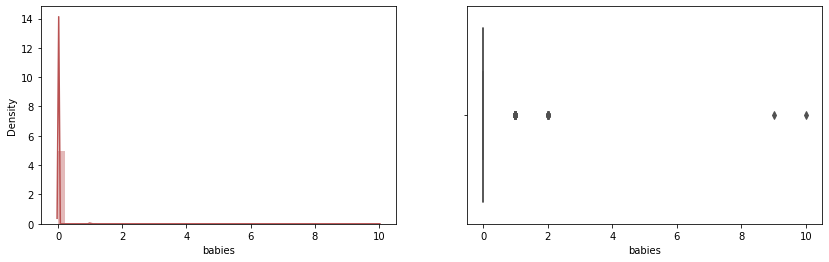

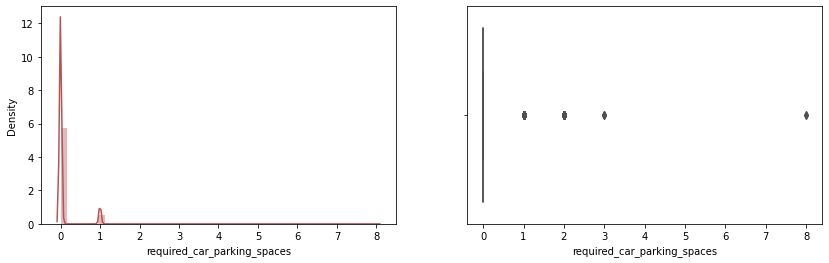

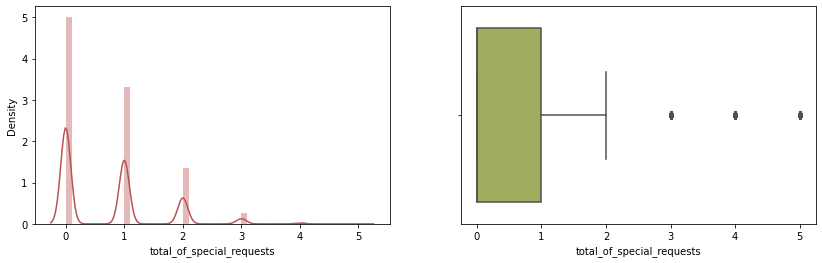

In [ ]:
#Memvisualisasikan Booking Attribute
for col in BookingAttribute:
    Numerical(df, col)

Observation:
1. Kebanyakan guest yang stay adalah adult yang berjumlah 2 orang, sedangkan beberapa di antaranya membawa children dan babies, tetapi kebanyakan tidak membawa anak sama sekali. Dapat dianalisa lebih lanjut mengenai hubungan ketiga kolom tersebut, sehingga dapat mengetahui tipe guest yang stay, seperti business, couple, family, etc yang mana dapat membantu hotel untuk menargetkan marketing
2. Seperti yang kita ketahui, kebanyakan orang di negara Eropa memilih untuk berkendara dengan public transportation. Sama halnya dengan hal tersebut, kebanyakan guest tidak membutuhkan tempat parkir. Meskipun terlihat pula bahwa terdapat guest yang membutuhkan tempat parkir lebih dari 1
3. Kebanyakan guest tidak memiliki request apapun ketika stay di hotel. Akan tetapi, masih ada beberapa guest yang memiliki special request untuk hotel selama stay, seperti bed type, high floor, etc
4. Sesuai yang telah diperkirakan sebelumnya, data memiliki banyak outlier dan tidak berdistribusi normal

####Bivariate Analysis

######Bar Plot untuk Mengetahui Hubungan is_canceled dengan Categorical Data

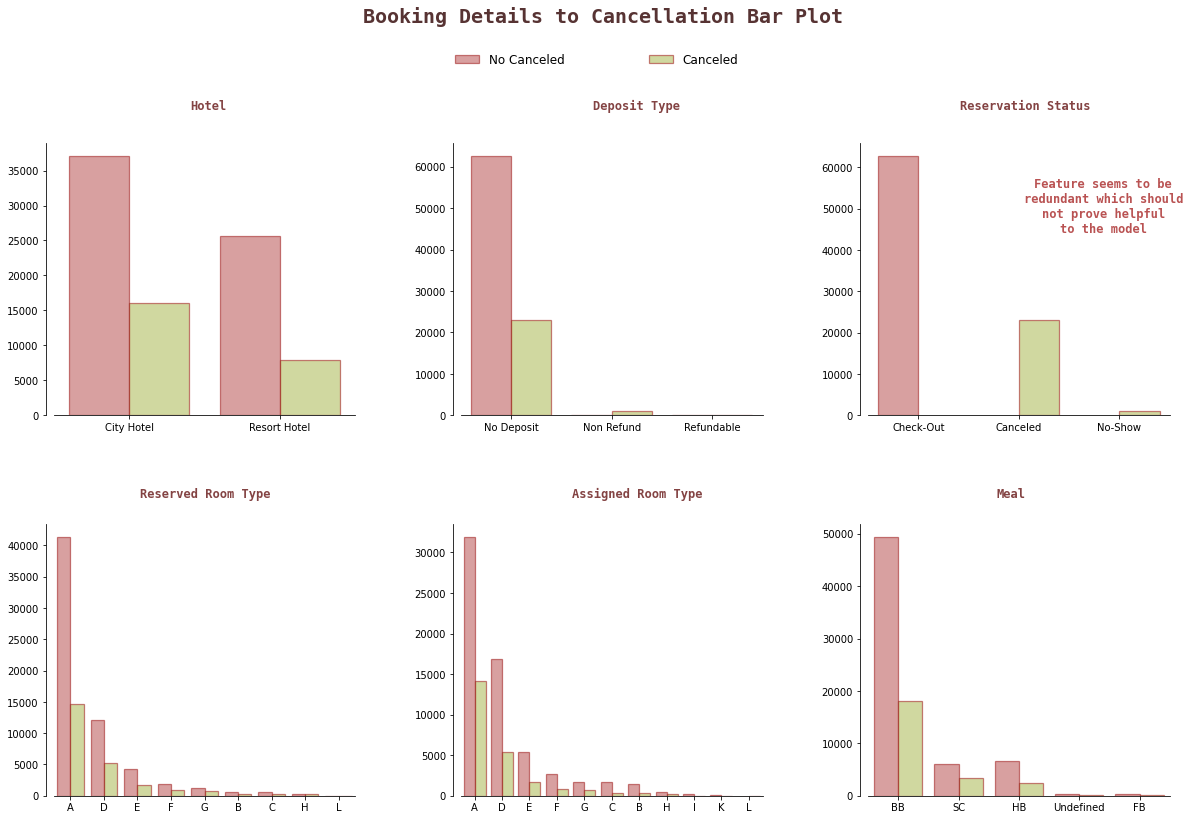

In [ ]:
#Memvisualisasikan Booking Details
#Menentukan Warna Bar Plot
c = [colors_red[3],colors_green[3]]

#Membuat Subplot
fig,ax = plt.subplots(2,3,figsize=(20,12))

#Menghilangkan Garis Subplot Kanan dan Atas
sns.despine()

#Menampilkan Judul Bar Plot
fig.text(s="Booking Details to Cancellation Bar Plot",size=20,fontweight="bold",
             fontname="monospace",color=colors_red[0],y=1.02,x=0.34,alpha=0.8)

for i in range(0,6):
        #Membuat Bar Plot
        sns.countplot(data=df,x=df[BookingDetails[i]],order=df[BookingDetails[i]].value_counts().index[0:12],
                      hue="is_canceled",ax=ax[i//3,i%3],palette=c,alpha=0.55,edgecolor=colors_red[2], lw=1.25,saturation=1)
        ax[i//3,i%3].get_legend().remove()
        ax[i//3,i%3].spines["left"].set_position(("outward", 8))
        #ax[i//3,i%3].set_ylim(0,65000)
        ax[i//3,i%3].set_xlabel(None)
        ax[i//3,i%3].set_ylabel(None)

#Menampilkan Label        
fig.text(s="Hotel",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.22,alpha=0.8)          
fig.text(s="Deposit Type",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.53,alpha=0.8,ha="center")
fig.text(s="Reservation Status",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.8,alpha=0.8,ha="center")
ax[0,2].set_title('Feature seems to be\nredundant which should\nnot prove helpful\nto the model',y=0.65,x=0.78,
        fontdict={'color':colors_red[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
fig.text(s="Reserved Room Type",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.47,x=0.23,alpha=0.8,ha="center")
fig.text(s="Assigned Room Type",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.47,x=0.53,alpha=0.8,ha="center")
fig.text(s="Meal",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.47,x=0.79,alpha=0.8,ha="center")

#Menampilkan Legend
fig.legend(["No Canceled","Canceled"],frameon=False,ncol=2,
           columnspacing=7,fontsize=12,bbox_to_anchor=(0.52,0.9))

#Mengadjust Space Subplot
fig.subplots_adjust(wspace=0.35,hspace=0.4)

Observation:
1. Secara keseluruhan, kebanyakan cancellation berasal dari city hotel dengan room type A dan include breakfast. Jika dilihat lebih detail, rata - rata cancel adalah 30% untuk masing - masing room type yang dibooking, sedangkan dari segi meal, % cancellation untuk BB, SC, dan HB hampir sama antara 34 - 37%. Untuk assigned room type, tidak mempengaruhi cancellation karena guest baru akan tahu mendapatkan room type tersebut di hari check-in
2. Seperti yang telah disebutkan di atas, reservation_status mengindikasikan hal yang sama dengan is_canceled, dimana check-out berarti tidak cancel dan canceled dan no show berarti cancel, sehingga harus didrop kolom
3. Dikarenakan tidak dibutuhkan deposit untuk membuat bookingan, maka banyak terdapat cancellation yang diterima oleh hotel. Akan tetapi, di sisi lain, keseluruhan booking yang non refund adalah booking yang cancel pula. Dengan demikian, perlu dianalisa lebih lanjut mengapa meskipun guest telah membayar penuh, tetapi tetap melakukan cancellation. Terlebih apabila kemungkinan hal ini terjadi karena berasal dari credit card yang tidak bisa dicharge, sehingga bookingan otomatis tercancel oleh sistem

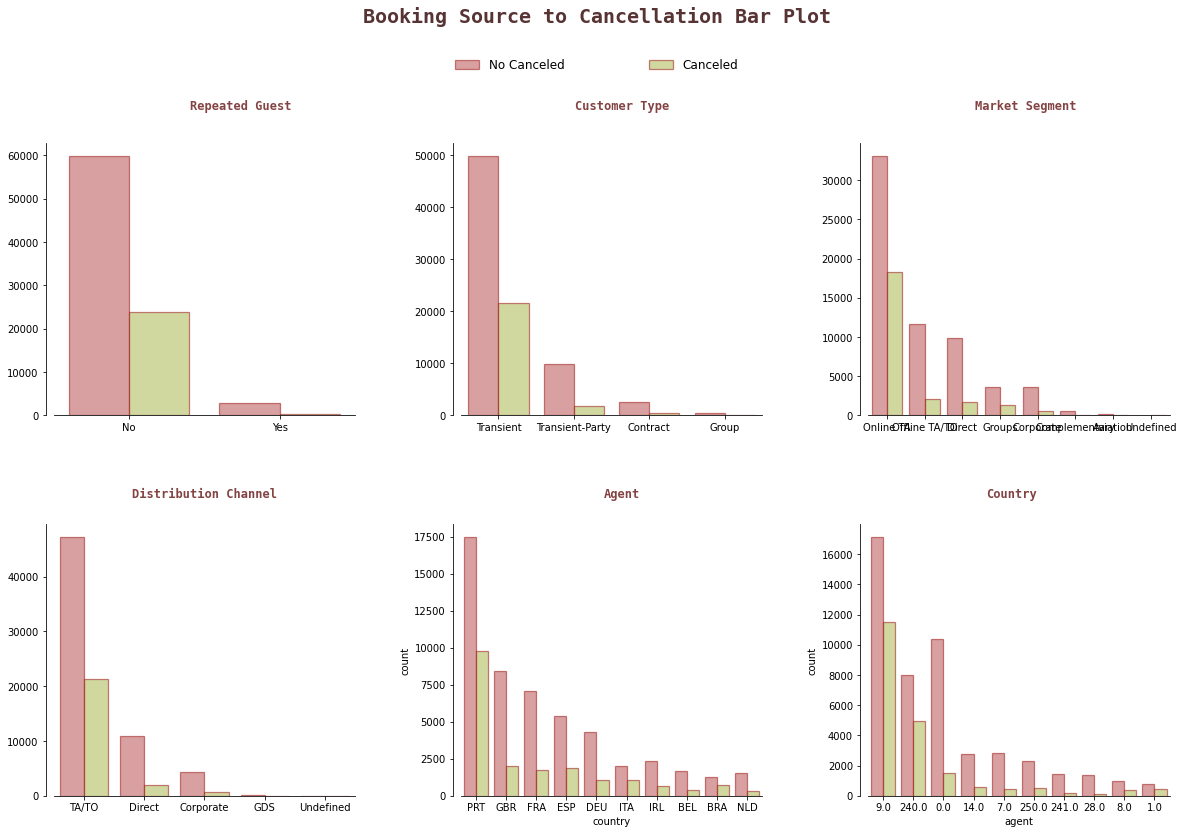

In [ ]:
#Memvisualisasikan Booking Source
#Menentukan Warna Bar Plot
c = [colors_red[3],colors_green[3]]

#Membuat Subplot
fig,ax = plt.subplots(2,3,figsize=(20,12))

#Menghilangkan Garis Subplot Kanan dan Atas
sns.despine()

#Menampilkan Judul Bar Plot
fig.text(s="Booking Source to Cancellation Bar Plot",size=20,fontweight="bold",
             fontname="monospace",color=colors_red[0],y=1.02,x=0.34,alpha=0.8)

for i in range(0,4):
        #Membuat Bar Plot
        sns.countplot(data=df,x=df[BookingSource[i]],order=df[BookingSource[i]].value_counts().index[0:10],hue="is_canceled",
                      ax=ax[i//3,i%3],palette=c,alpha=0.55,edgecolor=colors_red[2],lw=1.25,saturation=1)
        ax[i//3,i%3].get_legend().remove()
        ax[i//3,i%3].spines["left"].set_position(("outward", 8))
        #ax[i//3,i%3].set_ylim(0,65000)
        ax[i//3,i%3].set_xlabel(None)
        ax[i//3,i%3].set_ylabel(None)

#Memvisualisasikan Country
sns.countplot(data=df,x=df["country"],order=df["country"].value_counts().index[0:10],hue="is_canceled",ax=ax[1,1],palette=c,alpha=0.55,edgecolor=colors_red[2],
              lw=1.25,saturation=1)
ax[1,1].get_legend().remove()
ax[1,1].spines["left"].set_position(("outward", 8))

#Memvisualisasikan Agent
sns.countplot(data=df,x=df["agent"],order=df["agent"].value_counts().index[0:10],hue="is_canceled",ax=ax[1,2],palette=c,alpha=0.55,edgecolor=colors_red[2],
              lw=1.25,saturation=1)
ax[1,2].get_legend().remove()
ax[1,2].spines["left"].set_position(("outward", 8))

#Menampilkan Label        
fig.text(s="Repeated Guest",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.22,alpha=0.8)          
fig.text(s="Customer Type",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.52,alpha=0.8,ha="center")
fig.text(s="Market Segment",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.8,alpha=0.8,ha="center")
fig.text(s="Distribution Channel",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.47,x=0.23,alpha=0.8,ha="center")
fig.text(s="Agent",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.47,x=0.52,alpha=0.8,ha="center")
fig.text(s="Country",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.47,x=0.79,alpha=0.8,ha="center")

#Menampilkan Legend
fig.legend(["No Canceled","Canceled"],frameon=False,ncol=2,
           columnspacing=7,fontsize=12,bbox_to_anchor=(0.52,0.91))

#Mengadjust Space Subplot
fig.subplots_adjust(wspace=0.35,hspace=0.4)

Observation:
1. Meskipun jumlahnya sedikit, secara percentage dari keseluruhan repeater guest, terdapat 14% guest yang cancel. Apabila memungkinkan perlu dilihat lebih lanjut oleh hotel penyebab dari cancellation tersebut. Apabila guest pindah ke hotel lain, maka perlu dianalisa lebih lanjut weakness dari hotel. Untuk non repeater guest, terdapat hampir 40% guest yang cancel
2. Kebanyakan cancellation berasal dari transient, yang terdiri dari online travel agent dan beberapa offline travel agent. Dengan demikian, perlu direview kembali perihal cancellation policy yang diapply hotel untuk online travel agent mengingat juga tidak ada deposit yang dibutuhkan untuk booking
2. Secara percentage, agent 9.0 dan 24.0 yang cancel lebih banyak apabila dibandingkan dengan tidak cancel, sehingga perlu dianalisa lebih lanjut untuk mereview performance dari agent 9.0 dan 24.0 karena secara best practice, ada agent yang memblock kamar terlebih dahulu baru menjual kemudian ke guest ketika harga sudah lebih mahal untuk mendapatkan keuntungan tersendiri. Sebaliknya, agent dengan performance yang bagus adalah agent 14.0, 7.0, dan 25.0 dimana setiap bookingan yang dibuat lebih jarang cancel, sedangkan untuk terlihat bahwa agent 0.0 memiliki bookingan yang banyak dan jumlah cancel yang rendah, berarti bookingan non agent lebih banyak yang tidak cancel (mengingat agent 0.0 adalah hasil impute)
3. Booking yang diterima kebanyakan berasal dari Portugal, tetapi secara percentage, tingkat cancel dari Portugal juga tinggi. Kemungkinan banyak orang Portugal yang langsung membooking hotel terlebih dahulu karena terbujuk harga yang lebih murah/takut apabila lead time semakin dekat, harga akan semakin mahal, tanpa membuat perencanaan stay yang lebih matang karena lokasi yang dekat. Sebaliknya, orang dari negara yang lebih jauh tentu membuat perencanaan stay yang lebih matang (seperti membooking transportasi lebih dulu, etc), sehingga lebih jarang untuk cancel

######Bar Plot untuk Mengetahui Hubungan is_canceled dengan Date Data

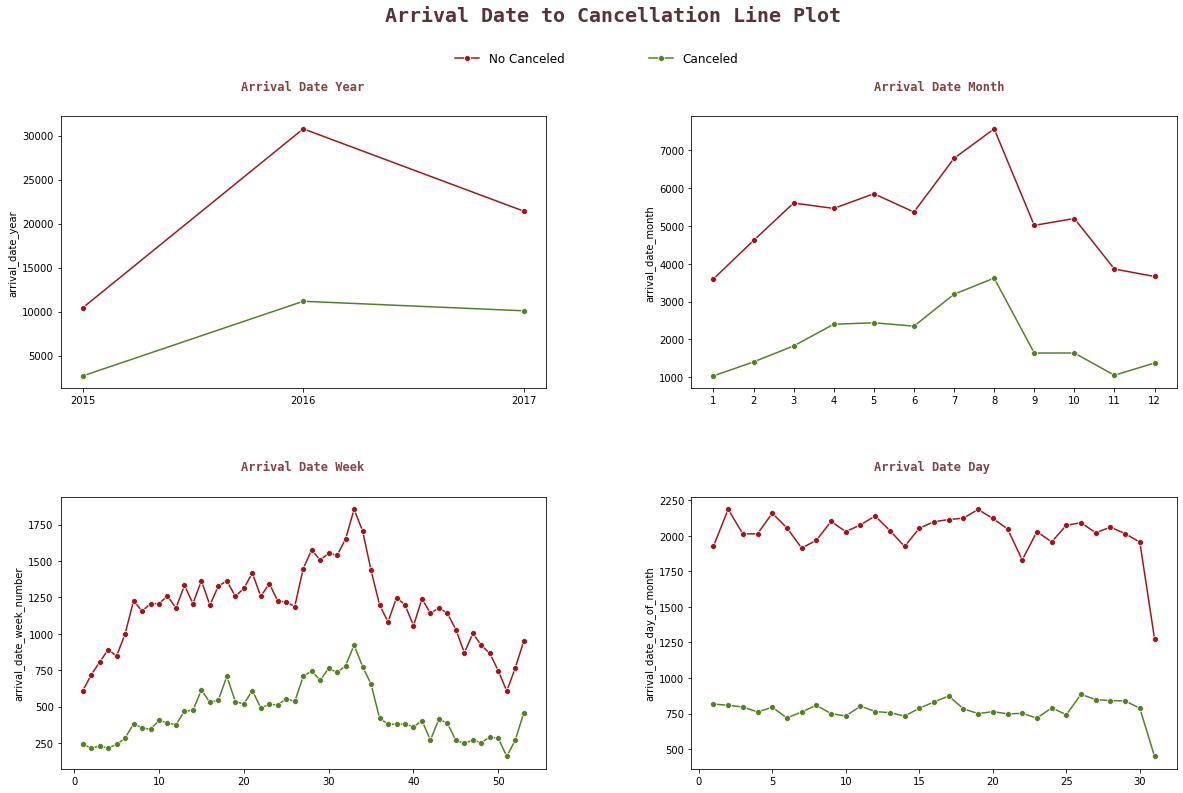

In [ ]:
#Membuat Subplot
fig, ax = plt.subplots(2,2,figsize=(20,12))

#Membuat Data untuk Visualisasi Year
arrival_year_cxl = df[df["is_canceled"]==1]
year_cxl = arrival_year_cxl["arrival_date_year"].value_counts()
arrival_year_no = df[df["is_canceled"]==0]
year_no = arrival_year_no["arrival_date_year"].value_counts()

#Membuat Data untuk Visualisasi Month
arrival_month_cxl = df[df["is_canceled"]==1]
month_cxl = arrival_month_cxl["arrival_date_month"].value_counts()
arrival_month_no = df[df["is_canceled"]==0]
month_no = arrival_month_no["arrival_date_month"].value_counts()

#Membuat Data untuk Visualisasi Week
arrival_week_cxl = df[df["is_canceled"]==1]
week_cxl = arrival_week_cxl["arrival_date_week_number"].value_counts()
arrival_week_no = df[df["is_canceled"]==0]
week_no = arrival_week_no["arrival_date_week_number"].value_counts()

#Membuat Data untuk Visualisasi Day
arrival_day_cxl = df[df["is_canceled"]==1]
day_cxl = arrival_day_cxl["arrival_date_day_of_month"].value_counts()
arrival_day_no = df[df["is_canceled"]==0]
day_no = arrival_day_no["arrival_date_day_of_month"].value_counts()

#Memvisualisasikan Arrival Date Year
ax0 = sns.lineplot(year_no.index, year_no,color=colors_red[2], ax=ax[0,0], markersize=6, marker = "o")
ax0 = sns.lineplot(year_cxl.index, year_cxl,color=colors_green[2], ax=ax[0,0], markersize=6, marker = "o")
ax0.set_xticks([2015,2016,2017])
fig.text(s="Arrival Date Year",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.91,x=0.25,alpha=0.8)

#Memvisualisasikan Arrival Date Month
ax1 = sns.lineplot(month_no.index, month_no,color=colors_red[2], ax=ax[0,1], markersize=6, marker = "o")
ax1 = sns.lineplot(month_cxl.index, month_cxl,color=colors_green[2], ax=ax[0,1], markersize=6, marker = "o")
ax1.set_xticks(range(1,13))
fig.text(s="Arrival Date Month",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.91,x=0.69,alpha=0.8)

#Memvisualisasikan Arrival Date Week
ax2 = sns.lineplot(week_no.index, week_no,color=colors_red[2], ax=ax[1,0], markersize=6, marker = "o")
ax2 = sns.lineplot(week_cxl.index, week_cxl,color=colors_green[2], ax=ax[1,0], markersize=6, marker = "o")
fig.text(s="Arrival Date Week",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.47,x=0.25,alpha=0.8)

#Memvisualisasikan Arrival Date Day
ax3 = sns.lineplot(day_no.index, day_no,color=colors_red[2],ax=ax[1,1], markersize=6, marker = "o")
ax3 = sns.lineplot(day_cxl.index, day_cxl,color=colors_green[2],ax=ax[1,1], markersize=6, marker = "o")
fig.text(s="Arrival Date Day",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.47,x=0.69,alpha=0.8)

#Menampilkan Judul Lineplot
fig.text(s="Arrival Date to Cancellation Line Plot",size=20,fontweight="bold",
             fontname="monospace",color=colors_red[0],y=0.99,x=0.35,alpha=0.8)

#Menampilkan Legend
fig.legend(["No Canceled","Canceled"],frameon=False,ncol=2,
           columnspacing=7,fontsize=12,bbox_to_anchor=(0.52,0.87))

#Mengadjust Space Subplot
fig.subplots_adjust(wspace=0.3,hspace=0.4)

Observation:
1. Cancellation paling banyak pada tahun 2016. Namun, secara persentase, cancellation tertinggi adalah pada tahun 2017 karena jumlah booking tidak sebanyak tahun 2016, tetapi jumlah cancellation hampir sama dengan tahun 2016. Dengan demikian, perlu dianalisa lebih lanjut penyebabnya karena terdapat peningkatan cancellation
2. Sejalan dengan jumlah booking, jumlah cancellation juga semakin tinggi pada bulan - bulan atau minggu - minggu tertentu yang jumlah bookingannya juga tinggi dan sebaliknya. Namun, perlu diperhatikan untuk bulan April dan Juni karena booking tidak setinggi bulan May, tetapi cancellation hampir sama
3. Untuk tanggal sendiri sangat bervariatif setiap bulannya yang mana hampir merata, sedangkan untuk tanggal 31 paling sedikit karena tidak semua bulan memiliki tanggal 31
5. Perlu dianalisa lebih lanjut event - event yang terjadi di Portugal dan hubungannya dengan stay date ataupun cancellation date

######Bar Plot untuk Mengetahui Hubungan is_canceled dengan Numerical Data

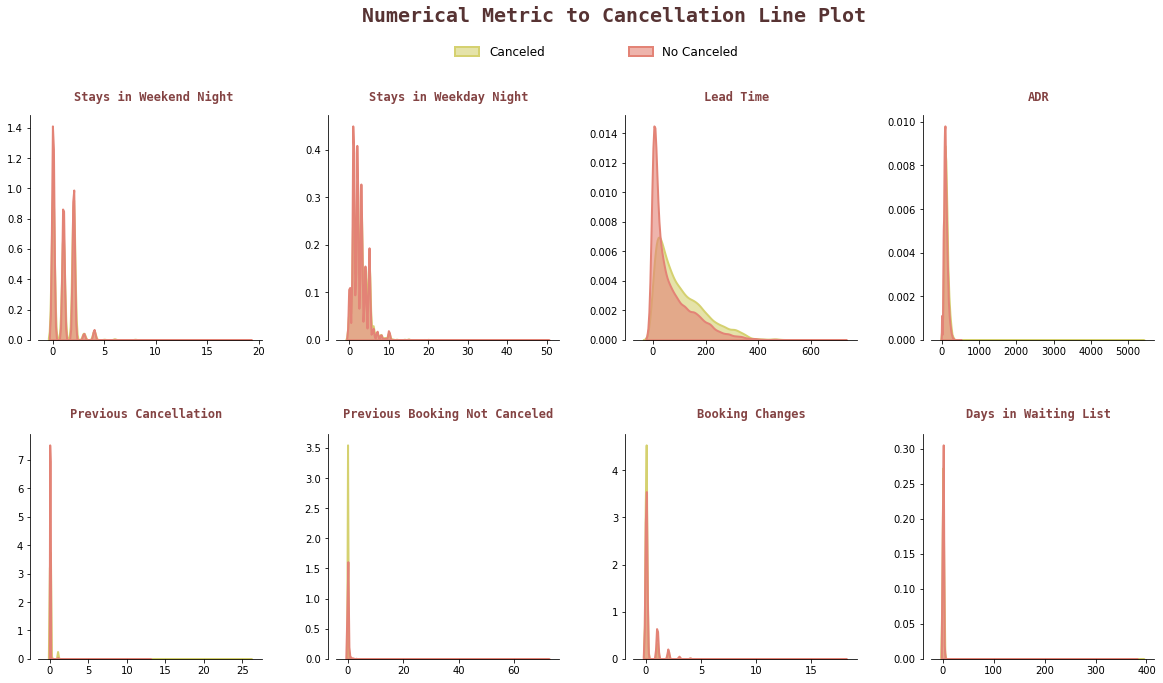

In [ ]:
#Memvisualisasikan Numerical Metric
#Menentukan Ukuran
fig = plt.figure(figsize = (20,10))

#Menentukan Warna
c = [colors_red[4],colors_green[4]]

for i,col in enumerate(NumericalMetric):
    #Membuat Subplot    
    plt.subplot(2,4,i + 1)

    #Menghilangkan Garis Subplot Kanan dan Atas
    sns.despine()

    #Membuat KDE Plot
    ax = sns.kdeplot(x=col, hue="is_canceled", data=df, shade=True,fill=True, common_norm=False,
                     palette=c,alpha=.6, linewidth=2, legend=False)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.spines["left"].set_position(("outward", 8))

#Menampilkan Label        
fig.text(s="Stays in Weekend Night",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.9,x=0.15,alpha=0.8)          
fig.text(s="Stays in Weekday Night",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.9,x=0.41,alpha=0.8,ha="center")
fig.text(s="Lead Time",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.9,x=0.61,alpha=0.8,ha="center")
fig.text(s="ADR",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.9,x=0.82,alpha=0.8,ha="center")
fig.text(s="Previous Cancellation",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.46,x=0.2,alpha=0.8,ha="center")
fig.text(s="Previous Booking Not Canceled",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.46,x=0.41,alpha=0.8,ha="center")
fig.text(s="Booking Changes",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.46,x=0.62,alpha=0.8,ha="center")
fig.text(s="Days in Waiting List",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.46,x=0.82,alpha=0.8,ha="center")

#Menampilkan Judul Lineplot
fig.text(s="Numerical Metric to Cancellation Line Plot",size=20,fontweight="bold",
             fontname="monospace",color=colors_red[0],y=1.01,x=0.35,alpha=0.8)

#Menampilkan Legend
fig.legend(["Canceled","No Canceled"],frameon=False,ncol=2,
           columnspacing=7,fontsize=12,bbox_to_anchor=(0.52,0.9))

#Mengadjust Space Subplot
fig.subplots_adjust(wspace=0.33,hspace=0.42)

Observation:
1. Guest yang sering cancel adalah guest dengan stay night di bawah 5 malam, baik untuk weekday maupun weekend
2. Guest yang membooking jauh hari sebelumnya lebih banyak yang cancel bila dibandingkan dengan guest yang booking dekat dengan tanggal check-in. Mengingat cancellation policy yang flexible, tentunya guest banyak yang booking jauh hari sebelumnya untuk mengantisipasi harga yang lebih murah dan dicancel sewaktu - waktu apabila tidak jadi untuk stay
3. Secara percentage, guest yang tidak pernah membuat perubahan bookingan paling banyak melakukan cancellation
4. Bentuk distribusi pada previous_cancellations, previous_bookings_not_canceled, dan days_in_waiting_list hampir sama antara satu dengan yang lain, dimana terbanyak adalah 0. Selain itu, seperti yang diketahui di atas, lebih dari 95% bookingan adalah new booking, sehingga terdapat keterbatasan data untuk mengetahui mengenai repeater guest

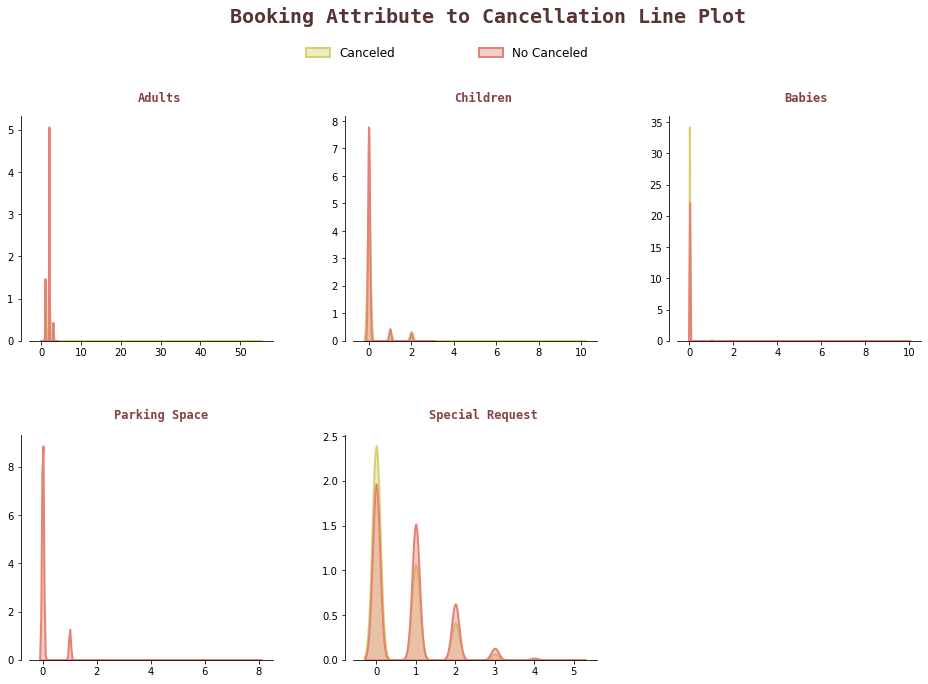

In [ ]:
#Memvisualisasikan NumericalMetric
#Menentukan Ukuran
fig = plt.figure(figsize = (16,10))

#Menentukan Warna
c = [colors_red[4],colors_green[4]]

for i,col in enumerate(BookingAttribute):
    #Membuat Subplot    
    plt.subplot(2,3,i + 1)

    #Menghilangkan Garis Subplot Kanan dan Atas
    sns.despine()

    #Membuat KDE Plot
    ax = sns.kdeplot(x=col, hue="is_canceled", data=df, shade=True,fill=True, common_norm=False,
                     palette=c,alpha=.4, linewidth=2, legend=False)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.spines["left"].set_position(("outward", 8))

#Menampilkan Label        
fig.text(s="Adults",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.9,x=0.22,alpha=0.8)          
fig.text(s="Children",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.9,x=0.52,alpha=0.8,ha="center")
fig.text(s="Babies",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.9,x=0.8,alpha=0.8,ha="center")
fig.text(s="Parking Space",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.46,x=0.24,alpha=0.8,ha="center")
fig.text(s="Special Request",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.46,x=0.52,alpha=0.8,ha="center")

#Menampilkan Judul Lineplot
fig.text(s="Booking Attribute to Cancellation Line Plot",size=20,fontweight="bold",
             fontname="monospace",color=colors_red[0],y=1.01,x=0.3,alpha=0.8)

#Menampilkan Legend
fig.legend(["Canceled","No Canceled"],frameon=False,ncol=2,
           columnspacing=7,fontsize=12,bbox_to_anchor=(0.52,0.9))

#Mengadjust Space Subplot
fig.subplots_adjust(wspace=0.33,hspace=0.42)

Observation:
1. Jumlah adults yang paling sering cancel adalah 2 orang, sedangkan terlihat pula bahwa jumlah children yang paling sering cancel adalah 0, 1, dan 2 dengan percentage cancellation yang hampir sama untuk ketiganya, yaitu sekitar 30 - 40%. Untuk guest yang tidak membawa babies, lebih sering cancel apabila dibandingkan dengan guest yang memiliki babies. Dengan demikian, dapat disimpulkan bahwa guest yang travelling tanpa anak (kemungkinan couple atau partner), lebih sering cancel karena lebih flexible. Selain itu, semakin banyak jumlah guest (di atas 5 untuk adults dan di atas 3 untuk children), semakin besar kemungkinan untuk cancel
2. Kebanyakan guest yang membutuhkan tempat parkir cenderung jarang untuk cancel. Seperti yang kita ketahui, harga tempat parkir di Portugal dapat dibilang mahal (kurang lebih Euro 10 - 20 per malam). Dengan demikian, guest yang telah pasti mendapat tempat parkir akan lebih jarang untuk cancel
3. Secara percentage, jumlah guest tanpa special request lebih banyak yang cancel daripada guest dengan special request. Kemungkinan guest yang lebih pasti untuk stay akan lebih hati - hati untuk memilih hotel dan telah mengetahui facility hotel, sehingga membuat 1 atau lebih request

## **Deep-Dive Question**

In [ ]:
#Membuat Dataframe Baru
deep_dive_df = df[["arrival_date_year","arrival_date_month","arrival_date_day_of_month","reservation_status","reservation_status_date","is_canceled",
                   "is_repeated_guest","lead_time","adults","children","babies","required_car_parking_spaces","market_segment","agent","country","hotel",
                   "reserved_room_type","assigned_room_type","adr","stays_in_week_nights","stays_in_weekend_nights"]]
deep_dive_df = deep_dive_df[deep_dive_df["market_segment"] != "Groups"]

In [ ]:
#Menggabungkan Arrival Date
deep_dive_df["year"] = deep_dive_df["arrival_date_year"]
deep_dive_df["month"] = deep_dive_df["arrival_date_month"]
deep_dive_df["day"] = deep_dive_df["arrival_date_day_of_month"]
deep_dive_df["arrival_date"] = pd.to_datetime(deep_dive_df[["year", "month", "day"]])
deep_dive_df.drop(columns=["arrival_date_year","arrival_date_month","arrival_date_day_of_month"])

#Membuat Kolom Baru untuk Cancellation Lead Time
deep_dive_df["arrival_reservation"] = (deep_dive_df["arrival_date"] - deep_dive_df["reservation_status_date"]).dt.days

In [ ]:
#Membuat Kolom Baru untuk Mengkategorikan Customer
Conditions = [
              (deep_dive_df["adults"] == 1) & (deep_dive_df["children"] == 0) & (deep_dive_df["babies"] == 0),
              (deep_dive_df["adults"] == 2) & (deep_dive_df["children"] == 0) & (deep_dive_df["babies"] == 0),
              (deep_dive_df["adults"] > 2) & (deep_dive_df["children"] == 0) & (deep_dive_df["babies"] == 0),
              (deep_dive_df["children"] != 0) | (deep_dive_df["babies"] != 0),
             ]

Values = ["Single", "Couple", "Friend", "Family"]

deep_dive_df["customer"] = np.select(Conditions, Values)

In [ ]:
#Menampilkan Dataframe
deep_dive_df.head(3)

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,reservation_status,reservation_status_date,is_canceled,is_repeated_guest,lead_time,adults,children,...,assigned_room_type,adr,stays_in_week_nights,stays_in_weekend_nights,year,month,day,arrival_date,arrival_reservation,customer
2,2015,7,1,Check-Out,2015-07-02,0,No,7,1,0.0,...,C,75.0,1,0,2015,7,1,2015-07-01,-1,Single
3,2015,7,1,Check-Out,2015-07-02,0,No,13,1,0.0,...,A,75.0,1,0,2015,7,1,2015-07-01,-1,Single
4,2015,7,1,Check-Out,2015-07-03,0,No,14,2,0.0,...,A,98.0,2,0,2015,7,1,2015-07-01,-2,Couple


In [ ]:
#Mensplit untuk Cancel dan Non-Cancel
deep_dive_no_cxl = deep_dive_df[(deep_dive_df["reservation_status"] != "Canceled") & (deep_dive_df["reservation_status"] != "No Show")]
deep_dive_cxl = deep_dive_df[(deep_dive_df["reservation_status"] == "Canceled") | (deep_dive_df["reservation_status"] == "No Show")]

###Bagaimanakah tipe customer repeater dan non-repeater guest yang stay di hotel?

In [ ]:
customer_repeat = (deep_dive_df
                  .groupby(["is_repeated_guest","customer"])
                  .agg(customer_count=("customer","count"))
                  .reset_index()
                  .sort_values("customer_count",ascending=False)        
                  )
customer_repeat_pivot=customer_repeat.pivot(index="is_repeated_guest",columns="customer", values="customer_count")

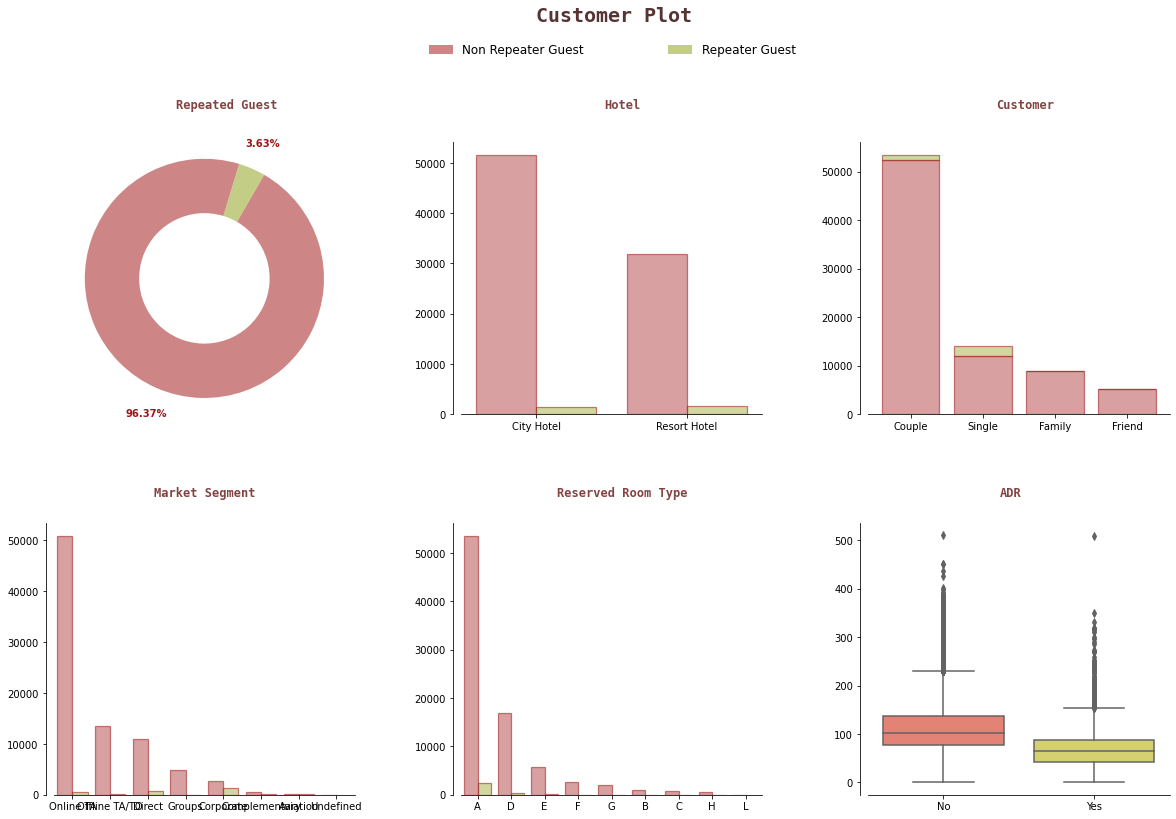

In [ ]:
#Memvisualisasikan Customer
#Menentukan Warna Bar Plot
c = [colors_red[3],colors_green[3],colors_green[4],colors_yellow[4]]

#Membuat Subplot
fig,ax = plt.subplots(2,3,figsize=(20,12))

#Menghilangkan Garis Subplot Kanan dan Atas
sns.despine()

#Menampilkan Judul Bar Plot
fig.text(s="Customer Plot",size=20,fontweight="bold",
             fontname="monospace",color=colors_red[0],y=1.02,x=0.46,alpha=0.8)

#Membuat Pie Chart Repeater Guest
ax[0,0].pie(df["is_repeated_guest"].value_counts(),autopct=autopct_generator(3),counterclock=False,
colors=c,wedgeprops={"width":0.5,"alpha":0.7},pctdistance=1.23,startangle=60,radius=1.1,
textprops={"fontsize": 10,"color": colors_red[2],"fontweight": "bold"})

#Membuat Bar Chart Berdasarkan Hotel
sns.countplot(data=df,x=df["hotel"],order=df["hotel"].value_counts().index[0:10],hue="is_repeated_guest",
              ax=ax[0,1],palette=c,alpha=0.55,edgecolor=colors_red[2],lw=1.25,saturation=1)
ax[0,1].spines["left"].set_position(("outward", 8))
ax[0,1].get_legend().remove()
ax[0,1].set_xlabel(None)
ax[0,1].set_ylabel(None)

#Menentukan Data untuk Stacked Plot untuk Customer
x = customer_repeat["customer"].unique()
y1 = [52495,11955,8924,5257]
y2 = [866,2104,83,39]

#Membuat Stacked Plot untuk Customer
ax[0,2].bar(x, y1, color = colors_red[3],alpha=0.55,edgecolor=colors_red[2],lw=1.25)
ax[0,2].bar(x, y2, bottom = y1, color = colors_green[3],alpha=0.55,edgecolor=colors_red[2],lw=1.25)
ax[0,2].spines["left"].set_position(("outward", 8))
ax[0,2].set_xlabel(None)
ax[0,2].set_ylabel(None)

#Membuat Bar Chart Berdasarkan Market Segment
sns.countplot(data=df,x=df["market_segment"],order=df["market_segment"].value_counts().index[0:10],hue="is_repeated_guest",
              ax=ax[1,0],palette=c,alpha=0.55,edgecolor=colors_red[2],lw=1.25,saturation=1)
ax[1,0].spines["left"].set_position(("outward", 8))
ax[1,0].get_legend().remove()
ax[1,0].set_xlabel(None)
ax[1,0].set_ylabel(None)

#Membuat Bar Chart Berdasarkan Reserved Room Type
sns.countplot(data=df,x=df["reserved_room_type"],order=df["reserved_room_type"].value_counts().index[0:10],hue="is_repeated_guest",
              ax=ax[1,1],palette=c,alpha=0.55,edgecolor=colors_red[2],lw=1.25,saturation=1)
ax[1,1].spines["left"].set_position(("outward", 8))
ax[1,1].get_legend().remove()
ax[1,1].set_xlabel(None)
ax[1,1].set_ylabel(None)

#Membuang Outlier adr untuk Membantu Visualisasi
adr_split = deep_dive_df[deep_dive_df["adr"] < 5000]

#Membuat Boxplot Berdasarkan adr
sns.boxplot(data=adr_split,y=adr_split["adr"],x=adr_split["is_repeated_guest"],ax=ax[1,2],palette=[colors_red[4],colors_green[4]],saturation=1)
ax[1,2].spines["left"].set_position(("outward", 8))
ax[1,2].set_xlabel(None)
ax[1,2].set_ylabel(None)

#Menampilkan Label        
fig.text(s="Repeated Guest",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.21,alpha=0.8)          
fig.text(s="Hotel",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.52,alpha=0.8,ha="center")
fig.text(s="Customer",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.8,alpha=0.8,ha="center")
fig.text(s="Market Segment",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.47,x=0.23,alpha=0.8,ha="center")
fig.text(s="Reserved Room Type",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.47,x=0.52,alpha=0.8,ha="center")
fig.text(s="ADR",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.47,x=0.79,alpha=0.8,ha="center")

#Menampilkan Legend
fig.legend(["Non Repeater Guest","Repeater Guest"],frameon=False,ncol=2,
           columnspacing=7,fontsize=12,bbox_to_anchor=(0.56,0.91))

#Mengadjust Space Subplot
fig.subplots_adjust(wspace=0.35,hspace=0.4)

Observation:
1. Terlihat bahwa jumlah repeater guest sangatlah sedikit apabila dibandingkan dengan jumlah guest yang datang, terutama untuk city hotel. Kebanyakan guest yang datang ke hotel adalah couple guest, akan tetapi, repeater guest terbanyak adalah guest yang travelling solo dan melihat lebih detail dari market segment bahwa repeater guest berasal dari corporate yang membooking lower room type category, yaitu A karena terlihat dari adr yang sangat rendah. Dengan demikian, dapat disimpulkan bahwa repeater guest yang stay adalah business traveler, dimana perusahaannya memiliki kerja sama dengan hotel
2. Terlihat pula bahwa new guest adalah guest yang travelling berdua saja/couple. Kebanyakan dari mereka membuat bookingan dari online travel agent dan membooking lower room type category, yaitu A. Namun, cukup banyak pula guest yang membooking dari market segment lain dan beragam room type category. Secara keseluruhan, dapat disimpulkan bahwa new guest adalah guest yang stay untuk holiday
3. Dari segi hotel, hal ini kurang baik karena berarti cenderung tidak ada guest yang loyal pada hotel. Padahal, repeater guest membantu untuk free marketing sekaligus menambah profit untuk hotel. Oleh karena itu, penting bagi hotel untuk mengevaluasi performancenya kembali karena bisa jadi terdapat ketidakpuasan dari guest

###Apakah terdapat perubahan harga pada masing - masing room type apabila booking jauh hari sebelumnya dan dekat dengan tanggal check-in (menggunakan lead time sebagai patokan)?

In [ ]:
#Mencari Mean dari Leadd Time Booking
lead_mean = deep_dive_df["lead_time"].mean()
lead_mean

76.25357610464619

In [ ]:
#Mensplit untuk Before dan After Lead Time
lead_before = deep_dive_df[(deep_dive_df["lead_time"] < lead_mean)]
lead_before = lead_before[(lead_before["adr"] < 5000)]
lead_after = deep_dive_df[(deep_dive_df["lead_time"] > lead_mean)]

Text(0.24, 1.02, 'ADR Difference Before and After Average Booking Lead Time')

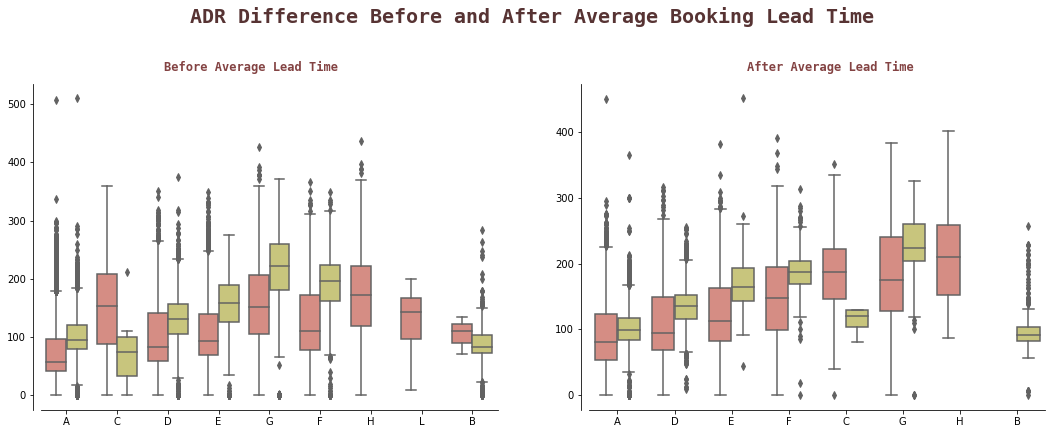

In [ ]:
#Menentukan Warna dan Label
color =  [colors_red[4],colors_green[4]]

#Membuat Subplot
fig, ax = plt.subplots(1,2,figsize=(18,6))

#Menghilangkan Garis Subplot Kanan dan Atas
sns.despine()

#Memvisualisasikan adr Sebelum Lead Time Mean (Jauh dari Tanggal Check-In)
sns.boxplot(x="reserved_room_type",y="adr",hue="hotel",data=lead_before, palette = color,ax=ax[0])
fig.text(s="Before Average Lead Time",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.91,x=0.22,alpha=0.8)
ax[0].spines["left"].set_position(("outward", 8))
ax[0].get_legend().remove()
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

#Memvisualisasikan adr Setelah Lead Time Mean (Dekat dari Tanggal Check-In)
sns.boxplot(x="reserved_room_type",y="adr",hue="hotel",data=lead_after, palette = color,ax=ax[1])
fig.text(s="After Average Lead Time",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.91,x=0.67,alpha=0.8)   
ax[1].spines["left"].set_position(("outward", 8))
ax[1].get_legend().remove()
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

#Menampilkan Judul Boxplot
fig.text(s="ADR Difference Before and After Average Booking Lead Time",size=20,fontweight="bold",
             fontname="monospace",color=colors_red[0],y=1.02,x=0.24,alpha=0.8)

In [ ]:
#Melihat Rata - Rata ADR per Room Type Sebelum Booking Lead TIme
adr_before = (lead_before
              .groupby(["reserved_room_type"])
              .agg(avg_adr=("adr","mean"))
              .reset_index())
adr_before

,reserved_room_type,avg_adr
0,A,92.608668
1,B,85.639071
2,C,150.781861
3,D,122.129457
4,E,124.283975
5,F,165.731880
6,G,174.077434
7,H,180.658737
8,L,124.666667


In [ ]:
#Melihat Rata - Rata ADR per Room Type Setelah Booking Lead TIme
adr_after = (lead_after
              .groupby(["reserved_room_type"])
              .agg(avg_adr=("adr","mean"))
              .reset_index())
adr_after

,reserved_room_type,avg_adr
0,A,98.211044
1,B,95.884530
2,C,183.857009
3,D,125.944880
4,E,133.234467
5,F,176.873375
6,G,186.686171
7,H,207.681048


Observation:
1. Hotel cenderung menaikkan harga room mendekati tanggal check-in. Mengingat terdapat cukup banyak guest yang walk-in, maka merupakan strategi yang bagus bagi hotel
2. Terlihat bahwa ADR untuk semua room type naik di atas 5% mendekati tanggal check-in, kecuali untuk room type D. Hal ini membenarkan kemungkinan bahwa hotel seringkali melakukan overbooking pada room type A, dan diassigned pada room type D. Hal ini terlihat dari kenaikan ADR room type D yang tidak sebanyak room type lainnya karena free upgrade, yang berarti revenue yang didapat hanya sebanyak room type A tapi pembaginya tetap bertambah sejumlah bertambahnya malam menginap

###Berapakah jumlah cancellation per tahun apabila displit per bulan dan berapakah jumlah revenue dari cancellation booking?

In [ ]:
#Membuat Data untuk Visualisasi Revenue
deep_dive_df["total RN"] = deep_dive_df["stays_in_week_nights"] + deep_dive_df["stays_in_weekend_nights"]
deep_dive_df["revenue"] = deep_dive_df["adr"] * deep_dive_df["total RN"]

#Menggroupkan Data untuk Revenue
revenue_grp = (deep_dive_df
              .groupby(["is_canceled","year"])
              .agg(revenue_sum=("revenue","sum"))
              .reset_index()
              .sort_values(["is_canceled","year"],ascending=False)
              )
revenue_grp

,is_canceled,year,revenue_sum
5,1,2017,5331991.55
4,1,2016,4790312.82
3,1,2015,1045878.86
2,0,2017,8490836.80
1,0,2016,10013546.71
0,0,2015,3537662.91


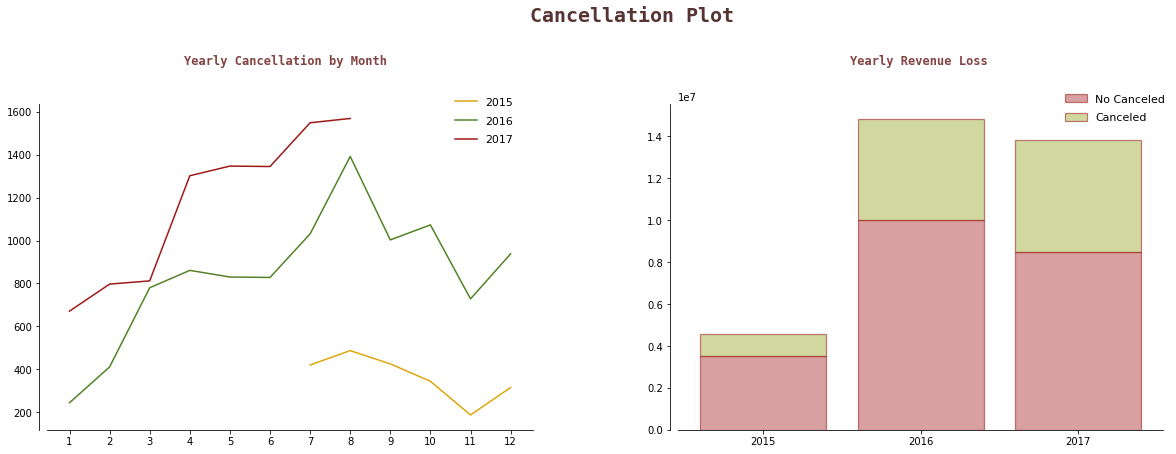

In [ ]:
#Memvisualisasikan Canceellation
#Menentukan Warna Bar Plot
c = [colors_red[3],colors_green[3],colors_green[4],colors_yellow[4]]

#Membuat Subplot
fig,ax = plt.subplots(1,2,figsize=(20,6))

#Menghilangkan Garis Subplot Kanan dan Atas
sns.despine()

#Menampilkan Judul Bar Plot
fig.text(s="Cancellation Plot",size=20,fontweight="bold",
            fontname="monospace",color=colors_red[0],y=1.07,x=0.46,alpha=0.8)

#Membuat Data untuk Visualisasi Cancellation Year & Month
y2015_df = deep_dive_cxl[deep_dive_cxl["year"]==2015]
y2016_df = deep_dive_cxl[deep_dive_cxl["year"]==2016]
y2017_df = deep_dive_cxl[deep_dive_cxl["year"]==2017]

y2015_month = y2015_df["month"].value_counts()
y2016_month = y2016_df["month"].value_counts()
y2017_month = y2017_df["month"].value_counts()

#Membuat Line Plot untuk Melihat Month pada Tahun 2015
sns.lineplot(y2015_month.index, y2015_month,color=colors_yellow[2],ax=ax[0])

#Membuat Line Plot untuk Melihat Month pada Tahun 2016
sns.lineplot(y2016_month.index, y2016_month,color=colors_green[2],ax=ax[0])

#Membuat Line Plot untuk Melihat Month pada Tahun 2017
sns.lineplot(y2017_month.index, y2017_month,color=colors_red[2],ax=ax[0])

#Mengatur Detail Line Plot
ax[0].set_xticks(np.arange(1, 13, 1))
ax[0].spines["left"].set_position(("outward", 8))
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

#Menentukan Data untuk Stacked Plot untuk Revenue Lost
x = [2015,2016,2017]
y1 = [3537662.91,10013546.71,8490836.80]
y2 = [1045878.86,4790312.82,5331991.55]

#Membuat Stacked Plot untuk Revenue Lost
ax[1].bar(x, y1, color = colors_red[3],alpha=0.55,edgecolor=colors_red[2],lw=1.25)
ax[1].bar(x, y2, bottom = y1, color = colors_green[3],alpha=0.55,edgecolor=colors_red[2],lw=1.25)
ax[1].spines["left"].set_position(("outward", 8))
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_xticks([2017,2016,2015])

#Menampilkan Label
fig.text(s="Yearly Cancellation by Month",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.97,x=0.22,alpha=0.8)          
fig.text(s="Yearly Revenue Loss",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.97,x=0.73,alpha=0.8,ha="center")

#Menampilkan Legend
ax[0].legend(["2015","2016","2017"],loc="upper center",bbox_to_anchor=(0.9,1.05),frameon=False,
labelspacing=0.8,fontsize=11)
ax[1].legend(["No Canceled","Canceled"],loc="upper center",bbox_to_anchor=(0.9,1.06),frameon=False,
labelspacing=0.8,fontsize=11)

#Mengadjust Space Subplot
fig.subplots_adjust(wspace=0.3,hspace=0.4)

Observation:
1. Terlihat bahwa jumlah cancellation bertambah banyak seiring dengan bertambahnya tahun
2. Terlihat bahwa kerugian revenue akibat cancellation bertambah dari tahun ke tahun. Terlebih, di tahun 2017, kerugian revenue bertambah semakin banyak dibandingkan tahun 2016, dimana padahal, tahun 2016 memiliki full year data, sedangkan tahun 2017 hanya hingga akhir Agustus (8 bulan)
3. Terlihat pentingnya untuk menghandle cancellation tersebut karena dapat mengurangi profit hotel

###Berapakah rata - rata lead time untuk cancellation period (selisih antara waktu cancel dengan waktu check-in)?

In [ ]:
#Memfilter untuk Reservation Status = Canceled Saja
cancel_only = deep_dive_df[(deep_dive_df["reservation_status"] == "Canceled")]

#Menghitung Mean dari Cancellation Lead Time
ave_cancel_leadtime = cancel_only["arrival_reservation"].mean()
ave_cancel_leadtime

64.69353128313892

Text(-200, 0.00115, 'Check-In Date')

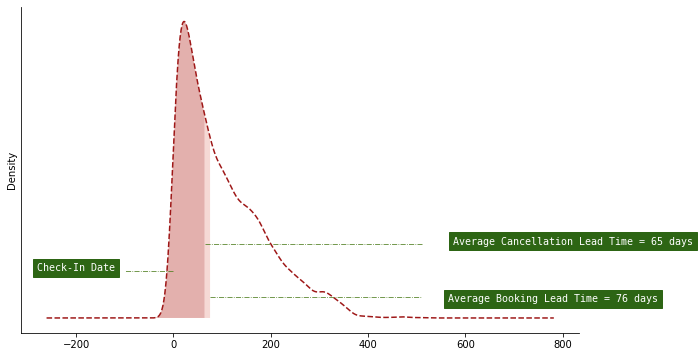

In [ ]:
#Memvisualisasikan Booking dan Cancellation Lead Time
#Membuat Garis Putus - Putus
custom_lines = [Line2D([0],[0], marker="o", color=colors_red[3], markerfacecolor=colors_red[2],ls="--",alpha=0.7)]

#Membuat Plot
plt.figure(figsize=(10,6))
ax = plt.axes()

#Menghilangkan Garis Subplot Kanan dan Atas
sns.despine()

#Menampilkan Judul KDE Plot
fig.text(s="Lead Time",size=24,fontweight="bold",
             fontname="monospace",color=colors_red[1],y=0.92,x=0.33,alpha=0.8)

#Memfilter Data untuk Visualisasi
deep_dive_df[deep_dive_df["is_canceled"]==1]["lead_time"].plot.kde(ls="--",color=colors_red[2])

#Mengatur Detail Line Plot
ax.set_yticks([])

#Membuat Garis Batas Warna
line = ax.get_lines()[-1]
x, y = line.get_data()
mask1 = x < lead_mean
mask2 = x < ave_cancel_leadtime
x1, y1 = x[mask1], y[mask1]
x2,y2 = x[mask2],y[mask2]
ax.fill_between(x1, y1, alpha=0.3, facecolor=colors_red[4])
ax.fill_between(x2, y2, alpha=0.3, facecolor=colors_red[3])

#Membuat Tulisan
ax.hlines(0.0005,xmin=76,xmax=510,ls='-.',color=colors_green[2],lw=0.8)
ax.hlines(0.0018,xmin=65,xmax=510,ls='-.',color=colors_green[2],lw=0.8)
ax.hlines(0.00115,xmin=0,xmax=-100,ls='-.',color=colors_green[2],lw=0.8)
ax.text(s="Average Cancellation Lead Time = 65 days",x=820,y=0.0018,
        fontdict={"color":"white","size":10,"fontname":"monospace","ha":"center"},
        backgroundcolor=colors_green[1])
ax.text(s="Average Booking Lead Time = 76 days",x=780,y=0.0004,
         fontdict={"color":"white","size":10,"fontname":"monospace","ha":"center"},
         backgroundcolor=colors_green[1])
ax.text(s="Check-In Date",x=-200,y=0.00115,
         fontdict={"color":"white","size":10,"fontname":"monospace","ha":"center"},
         backgroundcolor=colors_green[1])

Observation:
1. Pada visualisasi sebelumnya, terlihat bahwa rata - rata rentang waktu antara tanggal booking dan tanggal check-in adalah 76 hari, sedangkan rata - rata rentang waktu antara tanggal cancel dan tanggal check-in adalah 65 hari. Dengan mengetahui hal ini, hotel dapat membuat strategi untuk mereplace bookingan yang cancel tersebut dan membuat budgeting untuk variable cost dalam waktu 65 hari sebelum check-in

###Siapakah target pasar untuk melakukan marketing untuk mereplace bookingan yang cancel?

In [ ]:
#Memfilter untuk Menghilangkan Complimentary Booking
no_comp = deep_dive_no_cxl[deep_dive_no_cxl["market_segment"]!="Complementary"]
no_comp_lead = no_comp[no_comp["lead_time"]<ave_cancel_leadtime]

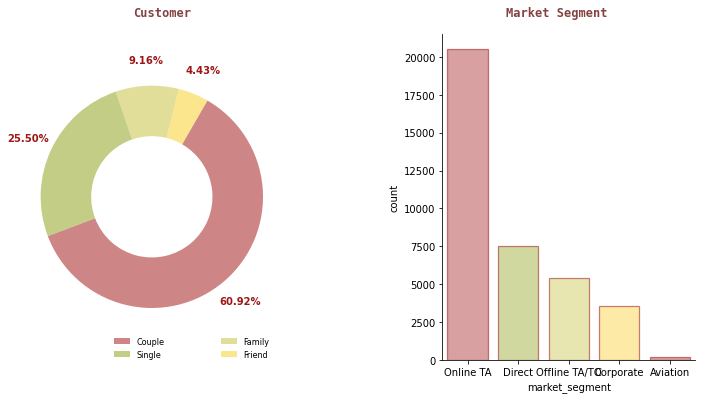

In [ ]:
#Memvisualisasikan Target Customer
#Menentukan Warna
c = [colors_red[3],colors_green[3],colors_green[4],colors_yellow[4]]

#Membuat Subplot
fig,ax = plt.subplots(1,2,figsize=(12,6))

#Menghilangkan Garis Subplot Kanan dan Atas
sns.despine()

#Membuat Pie Chart Berdasarkan Customer
ax[0].pie(no_comp_lead["customer"].value_counts(),autopct=autopct_generator(3),counterclock=False,
colors=c,wedgeprops={"width":0.5,"alpha":0.7},pctdistance=1.23,startangle=60,radius=1.1,
textprops={"fontsize": 10,"color": colors_red[2],"fontweight": "bold"})

#Menentukan Legend untuk Customer Type
fig.legend(["Couple","Single","Family","Friend"],frameon=False,ncol=2,
           columnspacing=7,fontsize=8,bbox_to_anchor=(0.32,0.16))

#Membuat Bar Chart Berdasarkan Market Segment
sns.countplot(data=no_comp_lead,x=no_comp_lead["market_segment"],order=no_comp_lead["market_segment"].value_counts().index[0:10],
              ax=ax[1],palette=c,alpha=0.55,edgecolor=colors_red[2],lw=1.25,saturation=1)

#Menampilkan Label   
fig.text(s="Customer",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.25,alpha=0.8)          
fig.text(s="Market Segment",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.92,x=0.74,alpha=0.8,ha="center")

#Mengadjust Space Subplot
fig.subplots_adjust(wspace=0.65,hspace=0.4)

Text(0.72, 0.72, 'Agent')

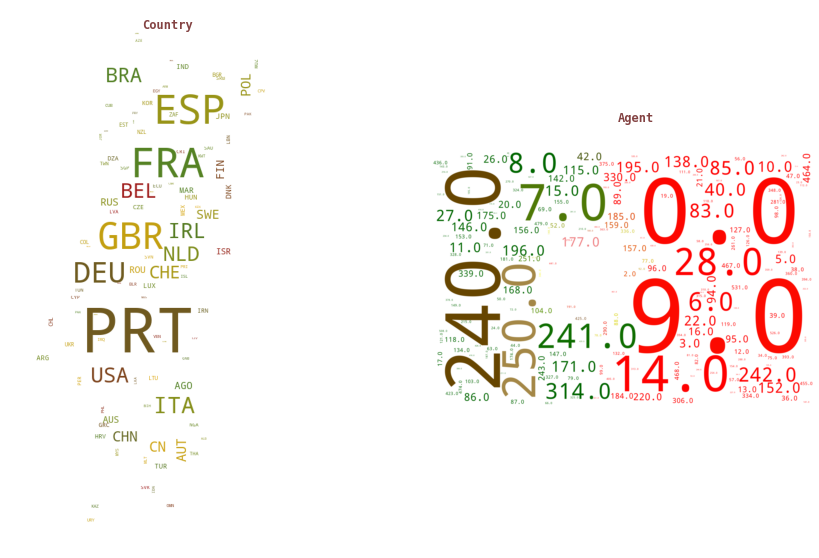

In [ ]:
#Memvisualisasikan Country
#Menginput Gambar
mask1 = np.array(Image.open("portugal map.jpg"))

#Menentukan Warna
color1 = matplotlib.colors.LinearSegmentedColormap.from_list("", [colors_red[2],colors_green[2],colors_yellow[2]])

#Membuat Wordcloud
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
wordcloud = WordCloud(mask=mask1,
                      collocations=False,
                      max_words=200,
                      colormap = color1,
                      background_color="White",
                      width=1200,
                      height=1000).generate(" ".join(no_comp_lead.country))
plt.imshow(wordcloud)
plt.axis("off")
fig.text(s="Country",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.85,x=0.28,alpha=0.8)  

#Memvisualisasikan Agent
#Menginput Gambar
mask2 = np.array(Image.open("portugal flag.png"))

#Menambahkan Subplot
ax = fig.add_subplot(1,2,2)

#Membuat Data Agent untuk Wordcloud
counts = no_comp_lead['agent'].value_counts()
counts.index = counts.index.map(str)

#Membuat Wordcloud
wordcloud = WordCloud(mask=mask2,
                      collocations=False,
                      max_words=200,
                      background_color="White",
                      width=1200,
                      height=1000).generate_from_frequencies(counts)

#Menentukan Warna
image_colors = ImageColorGenerator(mask2)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
fig.text(s="Agent",size=12,fontweight="bold",fontname="monospace",
         color=colors_red[1],y=0.72,x=0.72,alpha=0.8)

Observation:
1. Untuk mereplace bookingan yang cancel, hotel dapat melakukan marketing dengan menargetkan couple guest, sehingga dapat membuat konten - konten marketing bertemakan couple getaway atau honeymoon
2. Selain itu, dengan mengetahui bahwa hotel banyak menrima booking dari online travel agent dari negara tersebut (Portugal, Spain, etc), hotel dapat membuat flash sale melalui online travel agent dengan menargetkan guest dari negara tersebut
3. Untuk meningkatkan efisiensi dan membatasi promotion, hotel dapat menawarkan promotion terbatas kepada agent besar saja, seperti 9.0 dan 240.0, 7.0, 250,0, 241.0 yang merupakan biggest player market. Promotion dapat berupa misalnya cashback kepada agent, sehingga agent dapat membantu mempromosikan hotel
4. Selain itu, jika ingin menargetkan pasar yang lebih luas dapat dilakukan special promotion untuk online travel agent USA, Brazil, ataupun China

In [ ]:
#Menghitung Jumlah Guest yang Tidak Booking Sebelumnya Secara Total
walk_in_total = deep_dive_no_cxl["lead_time"][deep_dive_no_cxl["lead_time"] == 0].agg(["value_counts"])

#Menghitung Jumlah Guest yang Tidak Booking Sebelumnya Secara Daily
walk_in_daily = walk_in_total/(184+365+243)
walk_in_daily

,value_counts
0,6.683081


In [ ]:
walk_in = (deep_dive_no_cxl
          .groupby(["market_segment","country","customer","lead_time"])
          .agg(count=("customer","count"))
          .reset_index()
          .sort_values(["count"],ascending=False))
walk_in = walk_in[walk_in["lead_time"]== 0]
walk_in.head(10)

,market_segment,country,customer,lead_time,count
3513,Direct,PRT,Couple,0,834
752,Corporate,PRT,Single,0,501
4024,Direct,PRT,Single,0,476
17202,Online TA,PRT,Couple,0,421
17825,Online TA,PRT,Single,0,229
12894,Online TA,FRA,Couple,0,124
2081,Direct,FRA,Couple,0,121
12144,Online TA,ESP,Couple,0,120
1757,Direct,ESP,Couple,0,115
8321,Offline TA/TO,PRT,Single,0,109


Observation:
1. Selain itu, terlihat pula bahwa secara total dari 1 Juli 2015 - 31 Agustus 2017, rata - rata hotel dapat menerima 6 - 7 kamar walk-in guest / guest yang stay tanpa membuat reservasi sebelumnya. Dengan demikian, seperti yang telah disebutkan sebelumnya, sangat perlu bagi hotel untuk selalu menyiapkan kamar kosong yang ready-to-stay (in case, occupancy tidak 100%) dan menargetkan customer dari Portugal, Spain, dan France untuk marketing activity untuk menambah last-minute booking

## **Feature Engineering**

In [ ]:
#Membuang Data dengan market_segment Group dan Undefined
filterNotUsed = ((df["market_segment"] == "Groups") | (df["customer_type"] == "Group") |
              (df["market_segment"] == "Undefined") | (df["distribution_channel"] == "Undefined"))
df=df[~filterNotUsed]
df.shape

(81195, 31)

Observation:
1. Membuang data dengan market segment group dan undefined karena ingin memfokuskan pembuatan model pada non-goup booking saja. Selain itu, secara best practice, hotel memiliki cancellation policy yang berbeda untuk group. Hal ini dikarenakan group membooking jumlah kamar per malam yang banyak, sehingga hotel perlu untuk melakukan antisipasi dengan cancellation policy yang lebih ketat dengan range waktu yang lebih panjang FIT (frequent individual traveller) guest
2. Jumlah baris berkurang dari 86613 menjadi 81195

In [ ]:
#Membuang Data yang Tidak Seharusnya pada adults, children, babies, required_car_parking_spaces, lead_time, dan adr
filterAttribute = ((df["adults"] > 6) | (df["children"] > 4) | (df["babies"] > 4) | (df["required_car_parking_spaces"] > 6)) 
df=df[~filterAttribute]
df.shape

(81190, 31)

Observation:
1. Membuang data dengan jumlah adults di atas 6 dan jumlah children atau babies di atas 4. Hal ini dikarenakan pada bookingan non-group, jumlah occupancy per kamar di kebanyakan di hotel adalah 2 adults, dan terkadang terdapat policy untuk 3rd person charge dengan extra charges, sehingga jumlah guest per kamar bisa menjadi 3 adults atau 2 adults + 2 children atau 2 babies. Selain itu, terkadang terdapat room category bertipe 2-bedroom, dimana jumlah guest bisa dikalikan 2
2. Membuang data dengan jumlah kebutuhan tempat parkir di atas 6. Umumnya, tempat parkir yang disediakan oleh hotel adalah 1. Namun, karena dengan asumsi total adults dalam 1 kamar adalah 6 dan per masing - masing adults diizinkan membawa mobil, maka disamakan menjadi 6. Kebutuhan tempat parkir di atas itu dianggap tidak make sense mengingat bookingan adalah untuk non-group booking
3. Jumlah baris berkurang dari 81195 menjadi 81190. Terlihat bahwa point no. 1 dan 2 cukup make sense karena data yang terbuang pun hanya 5 baris, yang berarti kemungkinan ini adalah data outlier ataupun salah input

In [ ]:
#Membuang Data yang Tidak Seharusnya pada lead_time, dan adr
filterNumeric = ((df["lead_time"] > 548) | (df["adr"] > 500)) 
df=df[~filterNumeric]
df.shape

(81186, 31)

Observation:
1. Membuang data dengan lead time lebih dari 1.5 tahun. Secara best practice, sangat jarang hotel menerima bookingan lebih dari 1.5 tahun, kecuali apabila bookingan tersebut adalah group booking. Hal ini juga dikarenakan adanya limitasi pada system hotel
2. Membuang data dengan adr di atas 500 karena melihat distribusi adr rata - rata berada pada 107, sehingga dapat diasumsikan di atas 500 sudah sangat besar
3. Jumlah baris berkurang dari 81190 menjadi 81186. Terlihat bahwa point no. 1 dan 2 cukup make sense karena data yang terbuang pun hanya sedikit, yang berarti kemungkinan ini adalah data outlier ataupun salah input

In [ ]:
#Melakukan Log Transformation
df["stays_in_weekend_nights"] = np.log(df["stays_in_weekend_nights"]+1)
df["stays_in_week_nights"] = np.log(df["stays_in_week_nights"]+1)
df["lead_time"] = np.sqrt(df["lead_time"])

In [ ]:
#Melakukan Scaling dengan StandardScaler untuk Kolom Numeric
for col in df[["stays_in_weekend_nights","stays_in_week_nights","lead_time","adr","previous_cancellations","previous_bookings_not_canceled",
               "booking_changes","days_in_waiting_list","adults","children","babies","required_car_parking_spaces","total_of_special_requests"]]:
  std_scaler = StandardScaler()
  df[col] = std_scaler.fit_transform(df[col].values.reshape(len(df), 1))

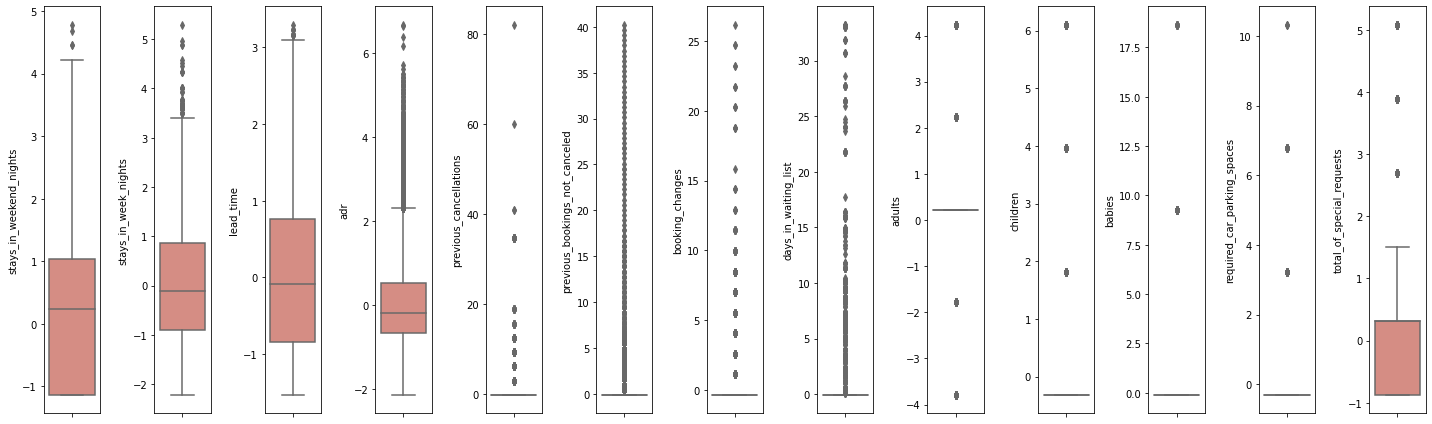

In [ ]:
#Mengelompokkan Kolom Numeric
Numeric = ["stays_in_weekend_nights","stays_in_week_nights","lead_time","adr","previous_cancellations","previous_bookings_not_canceled",
           "booking_changes","days_in_waiting_list","adults","children","babies","required_car_parking_spaces","total_of_special_requests"]

#Mengecek Ulang Boxplot
plt.figure(figsize=(20,6))
for i in range(0, len(Numeric)):
    plt.subplot(1, len(Numeric), i+1)
    sns.boxplot(y=df[Numeric[i]], color = colors_red[4])
    plt.tight_layout()

Observation:
1. Tidak membuang outlier selain yang telah dilakukan karena dengan membuang outlier tersebut sama saja dengan membuang data yang ada karena outlier tersebut masih tergolong make sense untuk kolom stays_in_weekend_nights, stays_in_week_nights, lead_time, dan adr
2. Untuk kolom previous_cancellations, previous_bookings_not_canceled, booking_changes, dan days_in_waiting_list, outlier dibiarkan karena most data adalah 0, sehingga dengan membuang outlier sama saja dengan membuang kolom tersebut dan data yang terdapat pada kolom itu sendiri termasuk make sense
3. Melakukan standardization untuk membuat mean di angka 0 dan standar deviasi di angka 1

In [ ]:
#Melakukan Label Encoding untuk Kolom dengan 2 Value
df["hotel"] = df["hotel"].map({"Resort Hotel" : 0, "City Hotel" : 1}).astype("float64")
df["is_repeated_guest"] = df["is_repeated_guest"].map({"No" : 0, "Yes" : 1}).astype("float64")

In [ ]:
#Mereplace Value untuk Meal Undefined Menjadi SC
df["meal"] = df["meal"].replace("Undefined","SC")
df["meal"].value_counts()

BB    63359
SC     9550
HB     7979
FB      298
Name: meal, dtype: int64

Observation:
1. Sesuai dengan definisi yang terdapat pada informasi data, disebutkan bahwa undefined dan SC adalah sama. Oleh karena itu, dapat direplace menjadi 1 untuk mengurangi kompleksitas

In [ ]:
#Melakukan One Hot Encoding
df = pd.get_dummies(df,columns = ["meal","market_segment","distribution_channel","deposit_type","customer_type","reserved_room_type"])
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type_Transient-Party,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L
2,0.0,0,-0.976801,2015,7,27,1,-1.133963,-0.892518,-1.784833,...,0,1,0,0,0,0,0,0,0,0
3,0.0,0,-0.776108,2015,7,27,1,-1.133963,-0.892518,-1.784833,...,0,1,0,0,0,0,0,0,0,0
4,0.0,0,-0.747649,2015,7,27,1,-1.133963,-0.118547,0.220113,...,0,1,0,0,0,0,0,0,0,0


Observation:
1. Telah berhasil mengubah categorical data menjadi numerical data
2. Jumlah kolom bertambah dari 31 menjadi 54

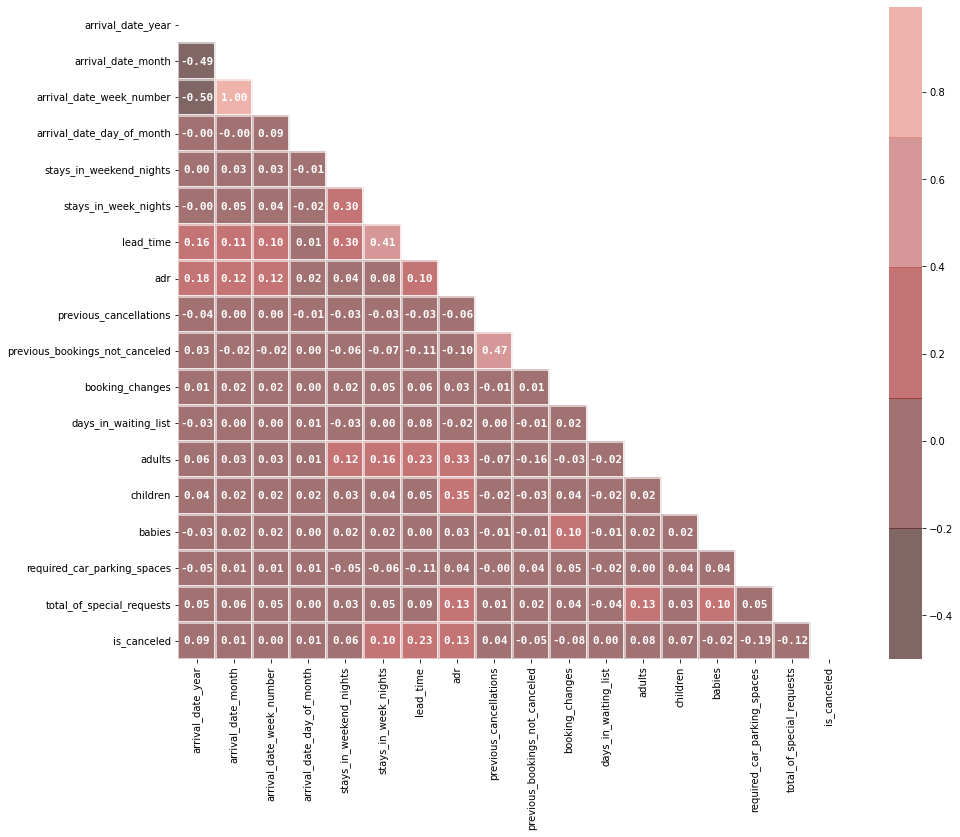

In [ ]:
#Mengecek Multikolinearitas dengan Correlation Heatmap
#Menentukan Feature
feature = ["arrival_date_year","arrival_date_month","arrival_date_week_number","arrival_date_day_of_month",
           "stays_in_weekend_nights","stays_in_week_nights","lead_time","adr","previous_cancellations","previous_bookings_not_canceled",
           "booking_changes","days_in_waiting_list","adults","children","babies","required_car_parking_spaces","total_of_special_requests",
           "is_canceled"]

#Membuat Plot
plt.figure(figsize=(15,12))

#Menentukan Data dan Detail
correlation = df[feature].corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

#Memvisualisasikan Correlation Plot
sns.heatmap(correlation, annot=True, fmt=".2f",cmap=colors_red,alpha=0.6,linewidths=2,
            annot_kws={'weight':'bold','family':'monospace','size':11},mask=mask)

In [ ]:
#Membuang Kolom yang Tidak Digunakan
df = df.drop(columns=["arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","days_in_waiting_list",
                      "reservation_status_date","reservation_status","assigned_room_type","agent","country"])
df.shape

(81186, 45)

Observation:

1. Membuang kolom di atas karena tidak diperlukan dalam model, sebagai berikut:

    a. arrival_date_year dan arrival_date_day_of_month : tidak dapat dimasukkan karena ingin membuat model yang dapat memprediksi future. Selain itu, apa yang telah terjadi sebelumnya, tidak tentu terjadi lagi di kemudian hari

    b. arrival_date_week_number : tidak dapat dimasukkan ke dalam model karena bermultikolinearitas dengan arrival_date_month, dan lebih memilih arrival_date_month karena korelasinya sedikit lebih tinggi dengan target variable

    c. days_in_waiting_list : secara best practice, bookingan yang masuk ke waitiing list belum dianggap sebagai booking yang memotong inventory oleh hotel, sehingga apabila cancel pun tidak akan mempengaruhi jumlah inventory hotel. Hal ini didukung dengan melihat pada nilai korelasi antara days_in_waiting list dengan target variable yang = 0

    d. reservation_status : seperti yang terlihat pada EDA, kolom reservation_status adalah redudancy dari is_canceled, dimana check-out = 0 dan no show dan canceled = 1

    e.  reservation_status_date : reservation_status_date berasosiasi dengan reservation_status karena reservation_status_date merupakan tanggal terakhir reservation_status diupdate. Dengan demikian, apabila reservation_status adalah check-out, tanggal dari reservation_status_date akan lebih besar daripada arrival_date, sedangkan apabila reservation_status adalah no show, tanggal dari reservation_status_date = tanggal dari arrival_date, dan apabila status cancel, maka tanggal dari reservation_status_date akan lebih kecil dari arrival_date. Selain itu, ingin memprediksi untuk future period

    f. assigned_room_type : assigned_room_type adalah feature yang hanya diketahui oleh hotel karena kolom ini merupakan kolom dimana hotel menentukan tipe kamar untuk guest stay dan bukan tipe kamar yang dibooking oleh guest, sehingga tidak akan menjadi penentu bagi guest dalam melakukan cancellation karena guest baru akan mengetahui di kamar mana akan stay pada saat check-in

    f. agent dan country : untuk generalisasi model agar dapat digunakan untuk semua hotel, maka kolom ini dibuang. Selain itu, karena keterbatasan sumber daya dan waktu, membuang kolom ini adalah hal yang tepat

2. Kolom telah berhasil dibuang dan jumlah kolom berkurang dari 54 menjadi 45


In [ ]:
#Mengecek Ulang Duplikat
df.duplicated().sum()

2695

In [ ]:
#Meremove Duplikat
df=df.drop_duplicates()

#Mengecek Ulang Dimensi Data
df.shape

(78491, 45)

Observation:
1. Mengecek ulang adanya duplikat baris setelah menghapus kolom dan ditemukan adanya duplikat sebanyak 2695 yang telah dihandle
2. Jumlah baris berkurang dari 81181 menjadi 78491

In [ ]:
#Mengecek Ulang Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78491 entries, 2 to 119389
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           78491 non-null  float64
 1   is_canceled                     78491 non-null  int64  
 2   lead_time                       78491 non-null  float64
 3   arrival_date_month              78491 non-null  int64  
 4   stays_in_weekend_nights         78491 non-null  float64
 5   stays_in_week_nights            78491 non-null  float64
 6   adults                          78491 non-null  float64
 7   children                        78491 non-null  float64
 8   babies                          78491 non-null  float64
 9   is_repeated_guest               78491 non-null  float64
 10  previous_cancellations          78491 non-null  float64
 11  previous_bookings_not_canceled  78491 non-null  float64
 12  booking_changes                

Observation:
1. Data memiliki 45 kolom dengan 78491 baris
2. Semua kolom memiliki tipe data numerical yang berarti siap untuk dilakukan modeling

## **Modeling**

###Classification

In [ ]:
#Menentukkan Variable X dan Y
X = df.drop(["is_canceled"],axis = 1)
y = df["is_canceled"]

In [ ]:
#Mensplit Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
#Memberi Nama pada Model
models = {"Logistic Regression": LogisticRegression(random_state=42),
          "Random Forest": RandomForestClassifier(random_state=42),
          "K-Nearest Neighbours": KNeighborsClassifier(),
          "XGBoost":XGBClassifier(random_state=42)}

Observation:
1. Menggunakan model Logistic Regression karena ingin melakukan klasifikasi pada model berdasarkan hubungan antara dependen dan independen variabel dengan memberikan bobot sebelum dimasukkan ke dalam fungsi signoid
2. Menggunakan model Random Rorest karena ingin melakukan klasifikasi pada model berdasarkan decision tree untuk memprediksi target variabel berdasarkan jumlah votenya
3. Menggunakan K-Nearest Neighbors karena ingin melakukan klasifikasi dengan memprediksi model berdasarkan label yang banyak dimiliki oleh tetangga terdekatnya 
4. Menggunakan model XGBoost karena ingin melakukan klasifikasi dengan advance ensemble model yang menggabungkan beberapa tree menjadi 1 model yang kuat
5. Memilih recall dan f1 sebagai metric utama karena ingin memiliki model yang dapat memprediksi dengan baik dan sekaligus mengurangi nilai false negatif. False Negatif di sini adalah guest yang cancel tetapi diprediksi tidak cancel, sehingga harus diminimalisasi. Namun demikian, tetap ingin memiliki model yang tidak terlalu timpang untuk nilai precisionnya, sehingga memasukkan f1 pula sebagai metric. Hal ini dikarenakan apabila model juga salah memprediksi guest yang tidak cancel sebagai cancel, dapat mendorong hotel untuk mereplace bookingan tersebut, sedangkan hotel memiliki inventory yang limited, sehingga tidak boleh terjadi overbooking. Secara best practice, apabila hotel mengalami overbooking, maka hotel harus mencarikan guest hotel lain yang setara atau bahkan lebih bagus sebagai gantinya. Dengan demikian, akan mengurangi profit hotel

#####Membuat Model Sebagai Basic Model

In [ ]:
#Mengecek Waktu Running
%%time

#Membuat Variabel Kosong untuk Mengelompokkan Hasil
model_df = []
accuracy = []
precision = []
recall = []
f1 = []

for model, model_launch in models.items(): 
    #Mengaplikasikan Model untuk Masing - Masing Metode
    model_initiated = model_launch
    model_initiated.fit(X_train, y_train)
    predictions = model_initiated.predict(X_test)
    
    #Mengappend Model Name
    model_df.append(model)
    
    #Mengappend Model Metric
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    
    #Menggabungkan Dalam Dataframe 
    scores_basic = pd.DataFrame({"Model":model_df,
                                 "Accuracy":accuracy, 
                                 "Precision":precision,
                                 "Recall":recall,
                                 "F1":f1}).sort_values(by="F1", ascending=False)

CPU times: user 43.7 s, sys: 3.46 s, total: 47.2 s
Wall time: 42.2 s


In [ ]:
#Menampilkan Hasil Dataframe
scores_basic
(scores_basic.style
                     .background_gradient(subset=["Accuracy","Precision","Recall","F1"])
                     .highlight_max(subset=["Accuracy","Precision","Recall","F1"], color="gold")
                     .set_caption("Model Performance Basic Model")
                     .format({"Accuracy": "{:.2%}",
                              "Precision": "{:.2%}",
                              "Recall": "{:.2%}",
                              "F1": "{:.2%}"}))

,Model,Accuracy,Precision,Recall,F1
1,Random Forest,79.05%,67.27%,51.04%,58.04%
3,XGBoost,79.23%,71.08%,45.28%,55.32%
2,K-Nearest Neighbours,76.26%,60.09%,48.75%,53.83%
0,Logistic Regression,77.29%,66.51%,40.27%,50.17%


Seperti yang telah disebutkan di atas, target variable memiliki jumlah data yang timpang pada target variablenya, dimana jumlah data untuk No lebih banyak daripada Yes. Oleh karena itu, perlu dilakukan balancing untuk menyeimbangkan data, baik dengan oversampling SMOTE maupun undersampling

#####Membuat Model dengan SMOTE

In [ ]:
#Melakukan SMOTE
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state = 42,sampling_strategy=0.5).fit_resample(X_train, y_train)

In [ ]:
#Mengecek Waktu Running
%%time

#Membuat Variabel Kosong untuk Mengelompokkan Hasil
model_df = []
accuracy = []
precision = []
recall = []
f1 = []

for model, model_launch in models.items():  
    #Mengaplikasikan Model untuk Masing - Masing Metode
    model_initiated = model_launch
    model_initiated.fit(X_train_smote, y_train_smote)
    predictions = model_initiated.predict(X_test)
    
    #Mengappend Model Name
    model_df.append(model)
    
    #Mengappend Model Metric
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    
    #Menggabungkan Dalam Dataframe    
    scores_smote = pd.DataFrame({"Model":model_df,
                                 "Accuracy": accuracy, 
                                 "Precision": precision,
                                 "Recall": recall,
                                 "F1":f1}).sort_values(by="F1", ascending=False)

CPU times: user 50 s, sys: 1.73 s, total: 51.7 s
Wall time: 51 s


In [ ]:
#Menampilkan Hasil Dataframe
scores_smote
(scores_smote.style
            .background_gradient(subset=["Accuracy","Precision","Recall","F1"])
            .highlight_max(subset=["Accuracy","Precision","Recall","F1"], color="gold")
            .set_caption("Model Performance SMOTE")
            .format({"Accuracy": "{:.2%}",
                      "Precision": "{:.2%}",
                      "Recall": "{:.2%}",
                      "F1": "{:.2%}"}))

,Model,Accuracy,Precision,Recall,F1
1,Random Forest,78.57%,64.93%,53.29%,58.53%
3,XGBoost,79.19%,68.77%,48.91%,57.17%
2,K-Nearest Neighbours,74.92%,56.00%,54.43%,55.21%
0,Logistic Regression,28.39%,28.39%,100.00%,44.23%


#####Membuat Model dengan Undersampling

In [ ]:
#Melakukan Undersampling
X_train_under, y_train_under = under_sampling.RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)

In [ ]:
#Mengecek Waktu Running
%%time

#Membuat Variabel Kosong untuk Mengelompokkan Hasil
model_df = []
accuracy = []
precision = []
recall = []
f1 = []

for model, model_launch in models.items():  
    #Mengaplikasikan Model untuk Masing - Masing Metode
    model_initiated = model_launch
    model_initiated.fit(X_train_under, y_train_under)
    predictions = model_initiated.predict(X_test)
    
    #Mengappend Model Name
    model_df.append(model)
    
    #Mengappend Model Metric
    accuracy.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    f1.append(f1_score(y_test, predictions))
    
    #Menggabungkan Dalam Dataframe    
    scores_undersampling = pd.DataFrame({"Model":model_df,
                                         "Accuracy": accuracy, 
                                         "Precision": precision,
                                         "Recall": recall,
                                         "F1":f1}).sort_values(by="F1", ascending=False)

CPU times: user 23 s, sys: 1.04 s, total: 24.1 s
Wall time: 20.8 s


In [ ]:
#Menampilkan Hasil Dataframe
scores_undersampling
(scores_undersampling.style
                     .background_gradient(subset=["Accuracy","Precision","Recall","F1"])
                     .highlight_max(subset=["Accuracy","Precision","Recall","F1"], color="gold")
                     .set_caption("Model Performance Undersampling")
                     .format({"Accuracy": "{:.2%}",
                              "Precision": "{:.2%}",
                              "Recall": "{:.2%}",
                              "F1": "{:.2%}"}))

,Model,Accuracy,Precision,Recall,F1
1,Random Forest,74.27%,53.34%,74.65%,62.22%
3,XGBoost,72.11%,50.59%,75.81%,60.69%
2,K-Nearest Neighbours,68.88%,46.89%,72.60%,56.98%
0,Logistic Regression,28.39%,28.39%,100.00%,44.23%


Observation:
1. Jika menggunakan accuracy sebagai metric yang utama, maka basic model memiliki accuracy dan precision yang paling tinggi bila dibandingkan dengan hasil model dengan menggunakan balance data yang telah ditreatment dengan SMOTE maupun undersampling. Precision yang tinggi tentunya dihasilkan karena lebih dari 70% data adalah negatif, yaitu (tidak cancel)
2. Tujuan dari membuat model adalah untuk memprediksi adanya cancel booking (positif). Dengan demikian, metric yang digunakan adalah recall dan f1. Dengan melihat pada nilai recall dan f1, maka memilih model dengan menggunakan balanced data yang telah ditreatment dengan undersampling. Selain itu, dengan menggunakan undersampling, maka data yang diambil adalah data yang sudah dipastikan sesuai dengan kenyataan yang ada dan tidak membuat data sintesis. Terlebih, mengingat keterbasan waktu, dengan undersampling, waktu running lebih cepat, terutama pada saat melakukan hyperparameter tuning nantinya

#####Membuat Model dengan Hyperparameter Tuning

In [ ]:
#Membuat Variabel Kosong untuk Mengelompokkan Hasil
model_tune = []
parameter_tune = []
accuracy_tune = []
precision_tune = []
recall_tune = []
f1_tune = []

######XGboost

In [ ]:
#Mengecek Waktu Running
%%time

#Membuat Random Forest Model
XGmodel = XGBClassifier(random_state=42)

#Membuat Parameter
XGparameter = {"n_estimators":[80,90,100,200,500], "max_depth":[6,7,8,9,10]}

#Membuat Cross Validation
XGgridcv = GridSearchCV(XGmodel, XGparameter, cv=5,scoring="f1")
XGgridcv.fit(X_train_under,y_train_under)

CPU times: user 33min 31s, sys: 4.7 s, total: 33min 35s
Wall time: 34min 32s


In [ ]:
#Menampilkan Hasil Gridsearchcv
XGresult=pd.DataFrame(XGgridcv.cv_results_)
XGretaincol=["params","mean_test_score","rank_test_score"]
XGresult[XGretaincol].sort_values("rank_test_score").head(5)

,params,mean_test_score,rank_test_score
22,"{'max_depth': 10, 'n_estimators': 100}",0.760586,1
21,"{'max_depth': 10, 'n_estimators': 90}",0.760115,2
20,"{'max_depth': 10, 'n_estimators': 80}",0.759638,3
12,"{'max_depth': 8, 'n_estimators': 100}",0.759357,4
18,"{'max_depth': 9, 'n_estimators': 200}",0.759214,5


Observation:
1. Model paling bagus adalah yang memiliki jumlah tree sebanyak 100 dengan kedalaman sebesar 10

In [ ]:
#Membuat Prediction untuk Test Data
XGpred = XGgridcv.best_estimator_.predict(X_test)

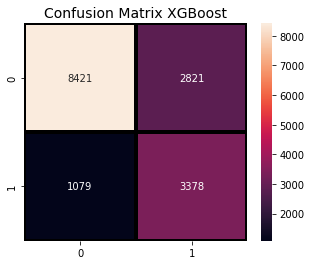

In [ ]:
#Membuat Grafik Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, XGpred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Confusion Matrix XGBoost",fontsize=14)
plt.show()

Observation:
1. Positive = cancel, negative = tidak cancel
2. True Negative : Dari sebanyak 8421 yang diprediksi untuk tidak cancel, benar terdapat 8421 yang tidak cancel
3. False Negative : Terdapat sebanyak 1079 yang cancel tetapi diprediksi tidak cancel
4. False Positive : Terdapat sebanyak 2821 yang tidak cancel tetapi diprediksi cancel
5. True Positive : Dari sebanyak 3378 yang diprediksi cancel, benar terdapat 3378 yang cancel

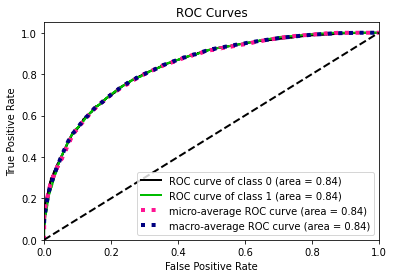

In [ ]:
#Membuat ROC Curve
XG_proba = XGgridcv.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, XG_proba)

In [ ]:
#Mengappend Model Name dan Best Parameter Tuning
model_tune.append("XGBoost")
parameter_tune.append(XGgridcv.best_params_)

#Mengappend Model Metric
accuracy_tune.append(accuracy_score(y_test, XGpred))
precision_tune.append(precision_score(y_test, XGpred))
recall_tune.append(recall_score(y_test, XGpred))
f1_tune.append(f1_score(y_test, XGpred))

######Logistic Regression

In [ ]:
#Mengecek Waktu Running
%%time

#Membuat Random Forest Model
LRmodel = LogisticRegression(random_state=42)

#Membuat Parameter
LRparameter = {"penalty":["l1","l2"],"C":np.logspace(-4,4,20)}

#Membuat Cross Validation
LRgridcv = GridSearchCV(LRmodel, LRparameter, cv=5,scoring="f1")
LRgridcv.fit(X_train_under,y_train_under)

CPU times: user 1min 17s, sys: 43.1 s, total: 2min 1s
Wall time: 1min 9s


In [ ]:
#Menampilkan Hasil Gridsearchcv
LRresult=pd.DataFrame(LRgridcv.cv_results_)
LRretaincol=["params","mean_test_score","rank_test_score"]
LRresult[LRretaincol].sort_values("rank_test_score").head(5)

,params,mean_test_score,rank_test_score
25,"{'C': 11.288378916846883, 'penalty': 'l2'}",0.728831,1
23,"{'C': 4.281332398719396, 'penalty': 'l2'}",0.728812,2
31,"{'C': 206.913808111479, 'penalty': 'l2'}",0.728752,3
17,"{'C': 0.23357214690901212, 'penalty': 'l2'}",0.728687,4
19,"{'C': 0.615848211066026, 'penalty': 'l2'}",0.728657,5


Observation:
1. Model paling bagus adalah yang memiliki C parameter (menentukan kekuatan regularization) 11.29 dan penalty (bentuk regularization) l2

In [ ]:
#Membuat Prediction untuk Test Data
LRpred = LRgridcv.best_estimator_.predict(X_test)

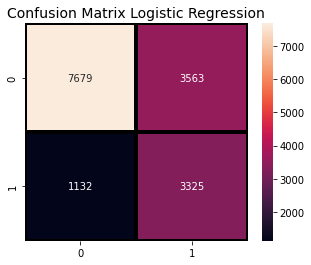

In [ ]:
#Membuat Grafik Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, LRpred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)  
plt.title("Confusion Matrix Logistic Regression",fontsize=14)
plt.show()

Observation:
1. Positive = cancel, negative = tidak cancel
2. True Negative : Dari sebanyak 7679 yang diprediksi untuk tidak cancel, benar terdapat 7679 yang tidak cancel
3. False Negative : Terdapat sebanyak 1132 yang cancel tetapi diprediksi tidak cancel
4. False Positive : Terdapat sebanyak 3563 yang tidak cancel tetapi diprediksi cancel
5. True Positive : Dari sebanyak 3325 yang diprediksi cancel, benar terdapat 3325 yang cancel

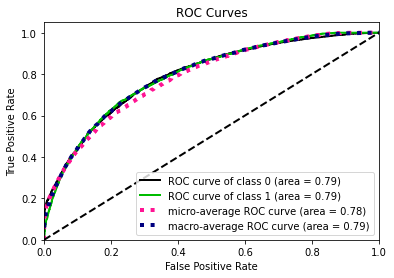

In [ ]:
#Membuat ROC Curve
LR_proba = LRgridcv.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, LR_proba)

In [ ]:
#Mengappend Model Name dan Best Parameter Tuning
model_tune.append("Logistic Regression")
parameter_tune.append(LRgridcv.best_params_)

#Mengappend Model Metric
accuracy_tune.append(accuracy_score(y_test, LRpred))
precision_tune.append(precision_score(y_test, LRpred))
recall_tune.append(recall_score(y_test, LRpred))
f1_tune.append(f1_score(y_test, LRpred))

######Random Forest

In [ ]:
#Mengecek Waktu Running
%%time

#Membuat Random Forest Model
RFmodel = RandomForestClassifier(random_state=42)

#Membuat Parameter
RFparameter = {"n_estimators":[200,300,400,500],"max_depth":[70,80,90,100,None]}

#Membuat Cross Validation
RFgridcv = GridSearchCV(RFmodel, RFparameter, cv=5,scoring="f1")
RFgridcv.fit(X_train_under,y_train_under)

CPU times: user 24min 39s, sys: 6.53 s, total: 24min 46s
Wall time: 25min 59s


In [ ]:
#Menampilkan Hasil Gridsearchcv
RFresult=pd.DataFrame(RFgridcv.cv_results_)
RFretaincol=["params","mean_test_score","rank_test_score"]
RFresult[RFretaincol].sort_values("rank_test_score").head(5)

,params,mean_test_score,rank_test_score
19,"{'max_depth': None, 'n_estimators': 500}",0.74928,1
15,"{'max_depth': 100, 'n_estimators': 500}",0.74928,1
3,"{'max_depth': 70, 'n_estimators': 500}",0.74928,1
11,"{'max_depth': 90, 'n_estimators': 500}",0.74928,1
7,"{'max_depth': 80, 'n_estimators': 500}",0.74928,1


Observation:
1. Model paling bagus adalah yang memiliki jumlah tree sebanyak 500 dengan kedalaman yang beragam antara 70 - 100 ataupun None

In [ ]:
#Membuat Prediction untuk Test Data
RFpred = RFgridcv.best_estimator_.predict(X_test)

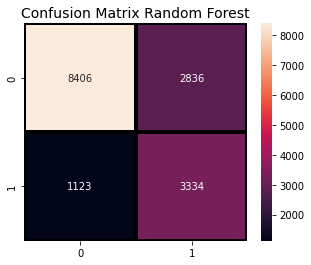

In [ ]:
#Membuat Grafik Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, RFpred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)  
plt.title("Confusion Matrix Random Forest",fontsize=14)
plt.show()

Observation:
1. Positive = cancel, negative = tidak cancel
2. True Negative : Dari sebanyak 8406 yang diprediksi untuk tidak cancel, benar terdapat 8406 yang tidak cancel
3. False Negative : Terdapat sebanyak 1123 yang cancel tetapi diprediksi tidak cancel
4. False Positive : Terdapat sebanyak 2836 yang tidak cancel tetapi diprediksi cancel
5. True Positive : Dari sebanyak 3334 yang diprediksi cancel, benar terdapat 3334 yang cancel

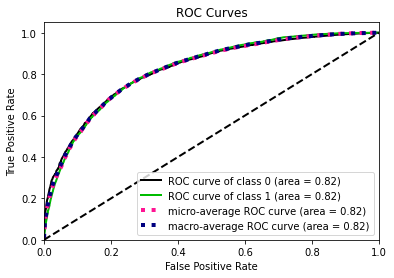

In [ ]:
#Membuat ROC Curve
RF_proba = RFgridcv.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, RF_proba)

In [ ]:
#Mengappend Model Name dan Best Parameter Tuning
model_tune.append("Random Forest")
parameter_tune.append(RFgridcv.best_params_)

#Mengappend Model Metric
accuracy_tune.append(accuracy_score(y_test, RFpred))
precision_tune.append(precision_score(y_test, RFpred))
recall_tune.append(recall_score(y_test, RFpred))
f1_tune.append(f1_score(y_test, RFpred))

######K-Nearest Neighbours

In [ ]:
#Mencoba Mencari Model dengan Metric Terbaik
mean_acc = np.zeros(20)
for i in range(1,21):
    #Membuat K-Nearest Neighbor Model  
    KN = KNeighborsClassifier(n_neighbors = i).fit(X_train_under,y_train_under)
    KN_trial = KN.predict(X_test)
    mean_acc[i-1] = metrics.f1_score(y_test,KN_trial)

mean_acc

array([0.53235372, 0.51990308, 0.56451043, 0.56366476, 0.56981863,
       0.57623073, 0.58141382, 0.58695229, 0.58591748, 0.58879939,
       0.58674912, 0.58952543, 0.58485915, 0.58783847, 0.58758354,
       0.5918443 , 0.58846221, 0.59300931, 0.5891011 , 0.59341263])

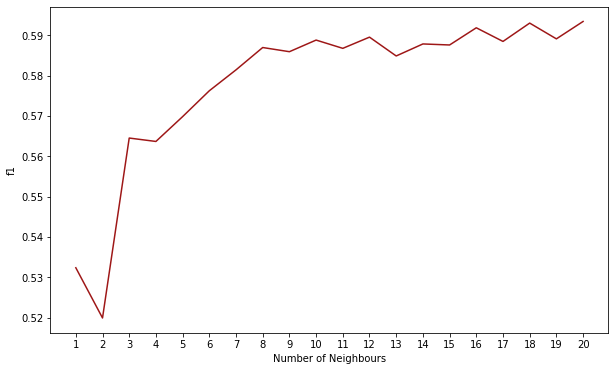

In [ ]:
#Memvisualisasikan K-Nearest Neighbours Terbaik
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc,color=colors_red[2])
plt.xticks(loc)
plt.xlabel("Number of Neighbours")
plt.ylabel("f1")
plt.show()

Observation:
1. Semakin banyak jumlah neighbours, maka model memiliki nilai f1 yang semakin baik. Dengan demikian, mencoba untuk melakukan hyperparameter tunning dengan jumlah neighbours 16, 18, 20

In [ ]:
#Mengecek Waktu Running
%%time

#Membuat KNN
KNmodel = KNeighborsClassifier()

#Membuat Parameter
KNparameter = {"n_neighbors":[16,18,20],"weights":["distance"],"metric":["minkowski","euclidean","manhattan"]}

#Membuat Cross Validation
KNgridcv = GridSearchCV(KNmodel, KNparameter, cv=5,scoring="f1")
KNgridcv.fit(X_train_under,y_train_under)

CPU times: user 7min 39s, sys: 8.43 s, total: 7min 48s
Wall time: 7min 22s


In [ ]:
#Menampilkan Hasil Gridsearchcv
KNresult=pd.DataFrame(KNgridcv.cv_results_)
KNretaincol=["params","mean_test_score","rank_test_score"]
KNresult[KNretaincol].sort_values("rank_test_score").head(5)

,params,mean_test_score,rank_test_score
8,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.732292,1
7,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.731808,2
6,"{'metric': 'manhattan', 'n_neighbors': 16, 'we...",0.729802,3
2,"{'metric': 'minkowski', 'n_neighbors': 20, 'we...",0.728593,4
5,"{'metric': 'euclidean', 'n_neighbors': 20, 'we...",0.728593,4


Observation:
1. Sesuai dengan yang model awal, model paling bagus adalah yang memiliki neighbors sebanyak 20 dan menggunakan manhattan sebagai metric dengan pembobotan distance

In [ ]:
#Membuat Prediction untuk Test Data
KNpred = KNgridcv.best_estimator_.predict(X_test)

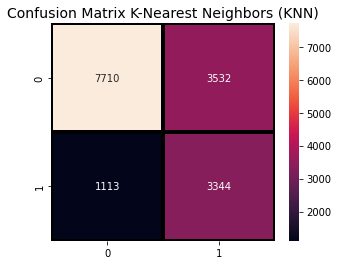

In [ ]:
#Membuat Grafik Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, KNpred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)  
plt.title("Confusion Matrix K-Nearest Neighbors (KNN)",fontsize=14)
plt.show()

Observation:
1. Positive = cancel, negative = tidak cancel
2. True Negative : Dari sebanyak 7710 yang diprediksi untuk tidak cancel, benar terdapat 7710 yang tidak cancel
3. False Negative : Terdapat sebanyak 1113 yang cancel tetapi diprediksi tidak cancel
4. False Positive : Terdapat sebanyak 3532 yang tidak cancel tetapi diprediksi cancel
5. True Positive : Dari sebanyak 3344 yang diprediksi cancel, benar terdapat 3344 yang cancel

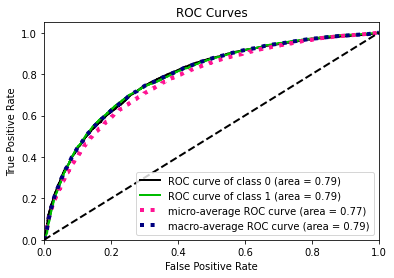

In [ ]:
#Membuat ROC Curve
KN_proba = KNgridcv.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, KN_proba)

In [ ]:
#Mengappend Model Name dan Best Parameter Tuning
model_tune.append("K-Nearest Neighbours")
parameter_tune.append(KNgridcv.best_params_)

#Mengappend Model Metric
accuracy_tune.append(accuracy_score(y_test, KNpred))
precision_tune.append(precision_score(y_test, KNpred))
recall_tune.append(recall_score(y_test, KNpred))
f1_tune.append(f1_score(y_test, KNpred))

######Memilih Best Model

In [ ]:
#Menggabungkan Dalam Dataframe    
scores_tuning = pd.DataFrame({"Model":model_tune,
                              "Parameter":parameter_tune,
                              "Accuracy": accuracy_tune, 
                              "Precision": precision_tune,
                              "Recall": recall_tune,
                              "F1":f1_tune}).sort_values(by="F1", ascending=False)

#Menampilkan Hasil Dataframe
scores_tuning
(scores_tuning.style
              .background_gradient(subset=["Accuracy","Precision","Recall","F1"])
              .highlight_max(subset=["Accuracy","Precision","Recall","F1"], color="gold")
              .set_caption("Model Performance Tuning")
              .format({"Accuracy": "{:.2%}",
                       "Precision": "{:.2%}",
                       "Recall": "{:.2%}",
                       "F1": "{:.2%}"}))

,Model,Parameter,Accuracy,Precision,Recall,F1
0,XGBoost,"{'max_depth': 10, 'n_estimators': 100}",75.16%,54.49%,75.79%,63.40%
2,Random Forest,"{'max_depth': 70, 'n_estimators': 500}",74.78%,54.04%,74.80%,62.75%
3,K-Nearest Neighbours,"{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}",70.41%,48.63%,75.03%,59.01%
1,Logistic Regression,"{'C': 11.288378916846883, 'penalty': 'l2'}",70.09%,48.27%,74.60%,58.62%


Observation:
1. Berdasarkan table di atas, model dengan semua metric terbaik adalah model XGBoost dengan jumlah tree sebanyak 100 dan kedalaman 10, yang memiliki metric sebagai berikut:

    a. Nilai accuracy adalah 75.16% yang berarti model dapat memprediksi  secara akurat sebesar 75.16%

    b. Nilai recall adalah 75.79% yang berarti dari seluruh data point yang benar-benar positive, model kita dapat memprediksi positive sebesar 75.79%

    c. Nilai precision adalah 54.49% yang berarti dari seluruh data point yang diprediksi positive oleh model, yang benar-benar positif secara aktual adalah 75%

    d. Rata-rata terbobot dari precision dan recall adalah sebesar 63.40%

In [ ]:
#Membuat Explainer untuk Gradient Boosting
canceled_xg_exp = dx.Explainer(XGgridcv,X_train_under, y_train_under, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 35650 rows 44 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 35650 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f63c0b5e0e0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.000223, mean = 0.5, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.935, mean = -5.17e-05, max = 0.923
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
#Membuat Feature Importance untuk Gradient Boosting
canceled_xg_exp.model_parts().plot()

Observation:
1. Top 3 variable importance yang diperoleh dengan model XGBoost adalah lead_time, total_of_special_requests, dan adr

In [ ]:
#Membuat Feature Importance untuk Gradient Boosting
canceled_xg_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 44/44 [00:15<00:00,  2.84it/s]


Observation:
1. Melalui lead_time, terlihat bahwa semakin lama guest booking dari check-in date, maka semakin tinggi cancellation. Sebaliknya, guest yang booking dekat dengan check-in date semakin jarang untuk cancel. Hal ini terjadi karena guest yang booking dekat dengan tanggal check-in pasti lebih yakin untuk stay
2. Melalui total_of_special_request, terlihat bahwa semakin banyak request yang dimiliki oleh guest, semakin jarang guest cancel. Hal ini menunjukkan bahwa guest yang memiliki special request adalah guest yang memang niat untuk stay, sedangkan guest yang tidak memiliki special request bisa jadi adalah guest yang asal-asalan booking saja
3. Melalui adr, terlihat bahwa semakin tinggi adr, guest semakin banyak yang cancel. Namun, pada suatu titik adr, cancellation rate menjadi tetap. Hal ini terjadi karena kebanyakan guest memilih untuk membooking kamar dengan harga BAR (Best Available Rate), dimana harga lebih mahal daripada advance purchase rate, tetapi free cancellation sampai period tertentu (lebih flexible untuk cancel)

## **Recommendation**

* Keep Existing Customer
  1. Hotel dapat membuat recap mengenai guest complain selama stay yang dishare ke seluruh leader dan direview dengan masing - masing staff yang related dengan complain tersebut
  2. Hotel mengirimkan guest survey mengenai guest experience selama stay setelah guest check-out dari hotel
  3. Hotel membuat membership dengan sistem mengumpulkan point yang dapat diredeem dengan benefit tertentu
  4. Hotel membuat VIP guest recognition untuk guest repeater guest, seperti memberikan zero-cost-gift, yaitu welcome card/decoration dan mencatat preference dari guest

* Add New Customer
  1. Melakukan marketing untuk meningkatkan brand awareness dari resort hotel karena kebanyakan booking adalah untuk city hotel. Hotel dapat melakukan marketing dengan memanfaatkan social media dengan content yang disesuaikan untuk couple guest. Selain itu, hotel juga dapat membuat bundling stay city hotel dan resort hotel
  2. Booking terbanyak adalah berasal dari online travel agent dan offline travel agent. Hotel perlu untuk shifting booking source dari online travel agent dan offline travel agent menjadi direct booking. Hal ini dikarenakan dengan amount yang sama yang diterima dari guest, booking dari online travel agent dan offline travel agent masih akan dipotong oleh komisi, sedangkan booking dari direct booking tidak dipotong apapun. Dapat dilakukan dengan cara memberikan special benefit untuk guest yang booking direct ke hotel, seperti free upgrade to next room category
  3. Kebanyakan guest stay di lower room category. Oleh karena itu, hotel dapat mengecilkan gap antara lower room category dengan next room category. Dengan selisih harga yang kecil, guest dapat terdorong untuk membayar sedikit lebih mahal untuk stay di higher room category 

* Maximum Efficiency - Cancellation
  1. Hotel dapat menerapkan cancellation policy yang lebih ketat, dimana cancellation policy yang ditentukan dapat dibedakan antara regular season dan high season, sehingga meskipun ketat, tetapi lebih adjustable dengan jumlah booking yang diterima pada period tertentu
  2. Hotel dapat membuat promosi untuk advance purchase booking, yaitu memberikan diskon dari harga regular (Best Available Rate (BAR)), tetapi tidak ada pengembalian uang apabila bookingan dicancel


## **References for Visualization**
https://www.kaggle.com/code/jaykumar1607/heart-attack-advanced-visualizations-modelling